# **National Diabetes Audit, 2024-25 (Exploratory Data Analysis)**

#### **Project Context**

- This analysis focuses on **Type 2 diabetes**, which accounts for around 90% of diabetes cases in England and has the greatest impact on NHS service planning and population health.

- The NDA sheet analysed is **"Type 2 and other registrations"**. While this category includes small numbers of other diabetes types (e.g., MODY, secondary diabetes), the vast majority are Type 2.

- The NDA dataset includes **"Detained Estates"**, covering healthcare in secure settings (e.g. prisons). This category was shown in the charts for completeness but was excluded from statistical summaries, as it is not directly comparable to geographic ICBs.

- The NDA data is published **quarterly**, with additional validation and full inclusion of specialist services in the annual release. This analysis uses the **April 2024 – March 2025 extract (June 2025 release)**.  


---

# 1. Data Cleaning and Preparation

This section describes how the raw NDA dataset (selected sheets) was cleaned and structured for analysis. Key steps included:

- Creating DataFrames for registered patients at two levels (national and ICB/regional) and for care process delivery and treatment target achievement at both levels.

- Cleaning these DataFrames by dropping unnecessary columns and rows, renaming columns for clarity, adjusting data types, identifying and managing duplicates and null values, and handling outliers if appropriate.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load all sheets into a dictionary
dfs = pd.read_excel("nda_2024_25.xlsx", sheet_name=None)

# Check what sheets exist
dfs.keys()


dict_keys(['Title sheet', 'Notes and definitions', 'Participation', 'Type 1 registrations', 'Type 2 and other registrations', 'Type 1 CP_TT', 'Type 2 and other CP_TT', 'Type 1 SE', 'Type 2 and other SE'])

## *1.1. Type 2 and other registrations*

In [5]:
# Use the 6th row as header as Excel file has blank/unnecesary data in the first few rows
df_t2_registrations = pd.read_excel("nda_2024_25.xlsx", sheet_name="Type 2 and other registrations", header=6)

# Show the first few rows of the Type 2 and Other Registrations DataFrame
df_t2_registrations.head()

,ICB code,ICB name,PCN code,PCN name,GP code,GP name,Registrations,Unnamed: 7,Aged \nunder 40,Aged \n40 to 64,...,IMD 2nd least deprived,IMD least deprived,IMD unknown,Unnamed: 24,Asian or Asian British,Black or Black British,Mixed Ethnicity,White,Any Other Ethnic Group,Ethnicity not stated/not known
0,NaN,NaN,NaN,NaN,NaN,NaN,Number,NaN,Per cent,Per cent,...,Per cent,Per cent,Per cent,NaN,Per cent,Per cent,Per cent,Per cent,Per cent,Per cent
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENGLAND,NaN,NaN,NaN,NaN,NaN,3753010,NaN,4.6,43.6,...,17.8,15.1,0,NaN,16.9,5.7,1.3,71.4,1.7,3
3,Q99,DETAINED ESTATES,NaN,NaN,NaN,NaN,4465,NaN,14.3,62.7,...,21.6,1.6,2.6,NaN,11.8,8.7,5.3,70.8,2,1.5
4,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,NaN,NaN,NaN,NaN,115515,NaN,4.2,42.2,...,18.7,11.6,0,NaN,14.8,0.8,0.6,79.9,2.6,1.3


In [6]:
# Drop rows 0 and 1 as they don't contain relevant data and reset the index
df_t2_registrations = df_t2_registrations.drop([0, 1]).reset_index(drop=True)

df_t2_registrations.head()

,ICB code,ICB name,PCN code,PCN name,GP code,GP name,Registrations,Unnamed: 7,Aged \nunder 40,Aged \n40 to 64,...,IMD 2nd least deprived,IMD least deprived,IMD unknown,Unnamed: 24,Asian or Asian British,Black or Black British,Mixed Ethnicity,White,Any Other Ethnic Group,Ethnicity not stated/not known
0,ENGLAND,NaN,NaN,NaN,NaN,NaN,3753010,NaN,4.6,43.6,...,17.8,15.1,0,NaN,16.9,5.7,1.3,71.4,1.7,3
1,Q99,DETAINED ESTATES,NaN,NaN,NaN,NaN,4465,NaN,14.3,62.7,...,21.6,1.6,2.6,NaN,11.8,8.7,5.3,70.8,2,1.5
2,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,NaN,NaN,NaN,NaN,115515,NaN,4.2,42.2,...,18.7,11.6,0,NaN,14.8,0.8,0.6,79.9,2.6,1.3
3,QF7,NHS SOUTH YORKSHIRE ICB,NaN,NaN,NaN,NaN,94630,NaN,5.1,43.6,...,13.1,6.8,0,NaN,7.9,3,1,84.4,1.2,2.5
4,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB,NaN,NaN,NaN,NaN,50305,NaN,3.3,37.5,...,22.7,17,0.3,NaN,4.2,0.8,0.6,91.4,0.5,2.6


In [7]:
# Show column names
df_t2_registrations.columns

Index(['ICB code', 'ICB name', 'PCN code', 'PCN name', 'GP code', 'GP name',
       'Registrations', 'Unnamed: 7', 'Aged \nunder 40', 'Aged \n40 to 64',
       'Aged \n65 to 79', 'Aged \n80 and over', 'Age unknown', 'Unnamed: 13',
       'Male', 'Female', 'Sex unknown', 'Unnamed: 17', 'IMD most deprived',
       'IMD 2nd most deprived', 'IMD 3rd most deprived',
       'IMD 2nd least deprived', 'IMD least deprived', 'IMD unknown',
       'Unnamed: 24', 'Asian or Asian British', 'Black or Black British',
       'Mixed Ethnicity', 'White', 'Any Other Ethnic Group',
       'Ethnicity not stated/not known'],
      dtype='object')

In [8]:
# Drop unnecessary columns for the analysis
df_t2_registrations = df_t2_registrations.drop(columns=[
    "PCN code", "PCN name", "GP code", "GP name",
    "Unnamed: 7", "Age unknown", "Unnamed: 13", "Sex unknown",
    "Unnamed: 17", "Unnamed: 24", 
    "IMD most deprived", "IMD 2nd most deprived", "IMD 3rd most deprived", 
    "IMD 2nd least deprived", "IMD least deprived", "IMD unknown"
])

df_t2_registrations.head()

,ICB code,ICB name,Registrations,Aged \nunder 40,Aged \n40 to 64,Aged \n65 to 79,Aged \n80 and over,Male,Female,Asian or Asian British,Black or Black British,Mixed Ethnicity,White,Any Other Ethnic Group,Ethnicity not stated/not known
0,ENGLAND,NaN,3753010,4.6,43.6,37.1,14.8,55.6,44.4,16.9,5.7,1.3,71.4,1.7,3
1,Q99,DETAINED ESTATES,4465,14.3,62.7,20.2,2.8,96.2,3.7,11.8,8.7,5.3,70.8,2,1.5
2,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,115515,4.2,42.2,38.9,14.7,56.3,43.7,14.8,0.8,0.6,79.9,2.6,1.3
3,QF7,NHS SOUTH YORKSHIRE ICB,94630,5.1,43.6,37.3,14,55.5,44.5,7.9,3,1,84.4,1.2,2.5
4,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB,50305,3.3,37.5,41.1,18.1,56.9,43.1,4.2,0.8,0.6,91.4,0.5,2.6


In [9]:
# Rename columns for clarity
df_t2_registrations = df_t2_registrations.rename(columns={
    "Registrations": "Registered Patients",
    "Aged \nunder 40": "Patients under 40",
    "Aged \n40 to 64": "Patients between 40 and 60",
    "Aged \n65 to 79": "Patients between 65 and 79",
    "Aged \n80 and over": "Patients over 80",
    "Any Other Ethnic Group": "Other Ethnicity"
})

df_t2_registrations.head()

,ICB code,ICB name,Registered Patients,Patients under 40,Patients between 40 and 60,Patients between 65 and 79,Patients over 80,Male,Female,Asian or Asian British,Black or Black British,Mixed Ethnicity,White,Other Ethnicity,Ethnicity not stated/not known
0,ENGLAND,NaN,3753010,4.6,43.6,37.1,14.8,55.6,44.4,16.9,5.7,1.3,71.4,1.7,3
1,Q99,DETAINED ESTATES,4465,14.3,62.7,20.2,2.8,96.2,3.7,11.8,8.7,5.3,70.8,2,1.5
2,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,115515,4.2,42.2,38.9,14.7,56.3,43.7,14.8,0.8,0.6,79.9,2.6,1.3
3,QF7,NHS SOUTH YORKSHIRE ICB,94630,5.1,43.6,37.3,14,55.5,44.5,7.9,3,1,84.4,1.2,2.5
4,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB,50305,3.3,37.5,41.1,18.1,56.9,43.1,4.2,0.8,0.6,91.4,0.5,2.6


In [10]:
# Show the data types of each column
df_t2_registrations.dtypes

ICB code                          object
ICB name                          object
Registered Patients               object
Patients under 40                 object
Patients between 40 and 60        object
Patients between 65 and 79        object
Patients over 80                  object
Male                              object
Female                            object
Asian or Asian British            object
Black or Black British            object
Mixed Ethnicity                   object
White                             object
Other Ethnicity                   object
Ethnicity not stated/not known    object
dtype: object

In [12]:
# Change data types of numerical columns to float (excluding first two columns)
numerical_cols_reg = df_t2_registrations.columns[2:]

# Replace string "u" with NaN, then convert to float
df_t2_registrations[numerical_cols_reg] = (
    df_t2_registrations[numerical_cols_reg]
    .replace(["u"], np.nan)
    .astype(float)
)

# Verify the changes
df_t2_registrations.dtypes

ICB code                           object
ICB name                           object
Registered Patients               float64
Patients under 40                 float64
Patients between 40 and 60        float64
Patients between 65 and 79        float64
Patients over 80                  float64
Male                              float64
Female                            float64
Asian or Asian British            float64
Black or Black British            float64
Mixed Ethnicity                   float64
White                             float64
Other Ethnicity                   float64
Ethnicity not stated/not known    float64
dtype: object

### *1.1.1. Type 2 and Other Registrations (National level)*

In [13]:
# Create a new DataFrame (National level) and reset index
df_t2_registrations_england = df_t2_registrations.iloc[[0]].reset_index(drop=True)

# Drop the 'ICB name' column as it's not needed for national level
df_t2_registrations_england = df_t2_registrations_england.drop(columns=["ICB name"])

df_t2_registrations_england.head()

,ICB code,Registered Patients,Patients under 40,Patients between 40 and 60,Patients between 65 and 79,Patients over 80,Male,Female,Asian or Asian British,Black or Black British,Mixed Ethnicity,White,Other Ethnicity,Ethnicity not stated/not known
0,ENGLAND,3753010.0,4.6,43.6,37.1,14.8,55.6,44.4,16.9,5.7,1.3,71.4,1.7,3.0


In [ ]:
# Check the shape of the DataFrame
df_t2_registrations_england.shape

(1, 14)

In [ ]:
# Check for null values
df_t2_registrations_england.isnull().sum()

ICB code                          0
Registered Patients               0
Patients under 40                 0
Patients between 40 and 60        0
Patients between 65 and 79        0
Patients over 80                  0
Male                              0
Female                            0
Asian or Asian British            0
Black or Black British            0
Mixed Ethnicity                   0
White                             0
Other Ethnicity                   0
Ethnicity not stated/not known    0
dtype: int64

### *1.1.2. Type 2 and Other Registrations (ICB level)*

In [16]:
# Create a new DataFrame (ICB level) and reset index
df_t2_registrations_icb = df_t2_registrations.iloc[1:44].reset_index(drop=True)

df_t2_registrations_icb.head()

,ICB code,ICB name,Registered Patients,Patients under 40,Patients between 40 and 60,Patients between 65 and 79,Patients over 80,Male,Female,Asian or Asian British,Black or Black British,Mixed Ethnicity,White,Other Ethnicity,Ethnicity not stated/not known
0,Q99,DETAINED ESTATES,4465.0,14.3,62.7,20.2,2.8,96.2,3.7,11.8,8.7,5.3,70.8,2.0,1.5
1,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,115515.0,4.2,42.2,38.9,14.7,56.3,43.7,14.8,0.8,0.6,79.9,2.6,1.3
2,QF7,NHS SOUTH YORKSHIRE ICB,94630.0,5.1,43.6,37.3,14.0,55.5,44.5,7.9,3.0,1.0,84.4,1.2,2.5
3,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB,50305.0,3.3,37.5,41.1,18.1,56.9,43.1,4.2,0.8,0.6,91.4,0.5,2.6
4,QH8,NHS MID AND SOUTH ESSEX ICB,72315.0,3.7,41.8,38.9,15.6,56.5,43.5,6.7,4.0,1.1,80.2,1.7,6.2


In [17]:
# Show the last few rows of the DataFrame (ICB level)
df_t2_registrations_icb.tail()

,ICB code,ICB name,Registered Patients,Patients under 40,Patients between 40 and 60,Patients between 65 and 79,Patients over 80,Male,Female,Asian or Asian British,Black or Black British,Mixed Ethnicity,White,Other Ethnicity,Ethnicity not stated/not known
38,QWE,NHS SOUTH WEST LONDON ICB,83205.0,4.7,47.9,34.2,13.2,54.8,45.2,32.2,16.8,3.6,42.4,3.0,2.1
39,QWO,NHS WEST YORKSHIRE ICB,175720.0,5.5,45.9,35.5,13.0,54.8,45.2,24.7,3.4,1.2,66.7,1.2,2.8
40,QWU,NHS COVENTRY AND WARWICKSHIRE ICB,63835.0,5.0,43.6,36.2,15.3,55.5,44.5,18.4,4.3,1.2,71.6,1.1,3.3
41,QXU,NHS SURREY HEARTLANDS ICB,51310.0,3.9,39.7,37.8,18.7,57.4,42.6,14.8,2.3,1.6,75.9,1.7,3.7
42,QYG,NHS CHESHIRE AND MERSEYSIDE ICB,158585.0,3.9,41.6,39.1,15.3,56.5,43.5,4.2,1.4,1.0,90.0,1.5,1.9


In [18]:
# Check the shape of the DataFrame
df_t2_registrations_icb.shape

(43, 15)

In [ ]:
# Check duplicates
df_t2_registrations_icb.duplicated().sum()

np.int64(0)

In [ ]:
# Check for null values
df_t2_registrations_icb.isnull().sum()

ICB code                          0
ICB name                          0
Registered Patients               0
Patients under 40                 0
Patients between 40 and 60        0
Patients between 65 and 79        0
Patients over 80                  0
Male                              0
Female                            0
Asian or Asian British            0
Black or Black British            0
Mixed Ethnicity                   0
White                             0
Other Ethnicity                   0
Ethnicity not stated/not known    0
dtype: int64

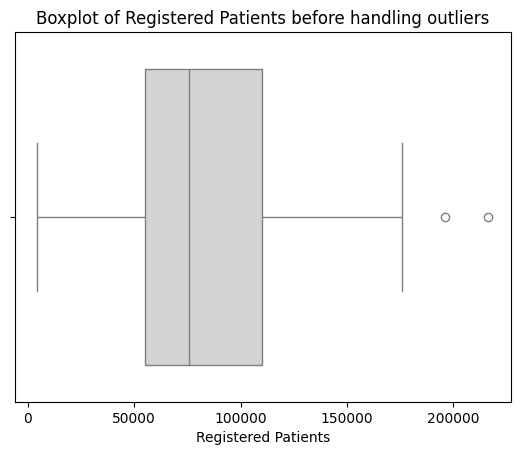

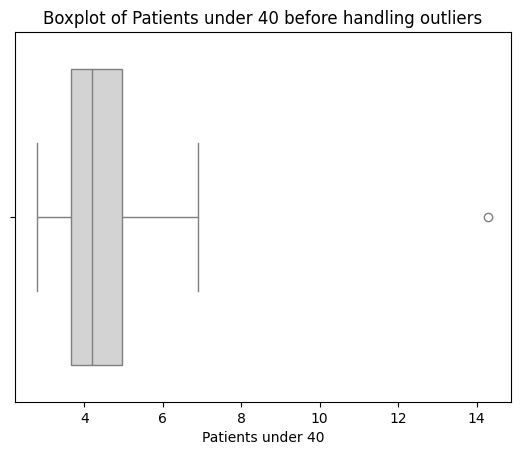

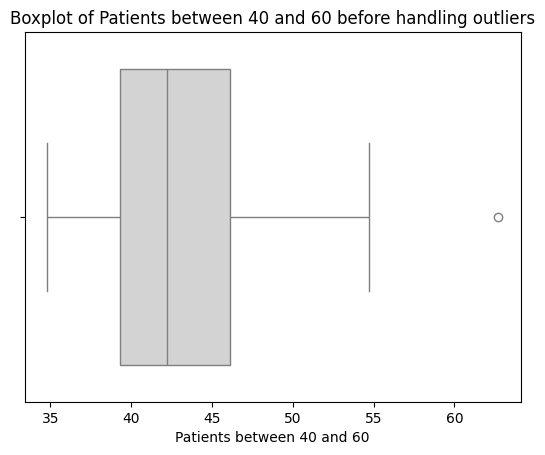

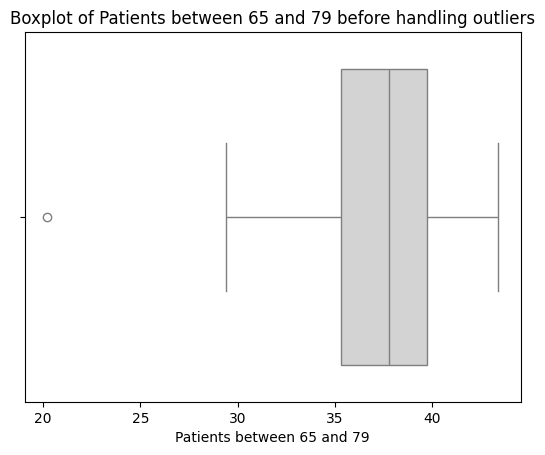

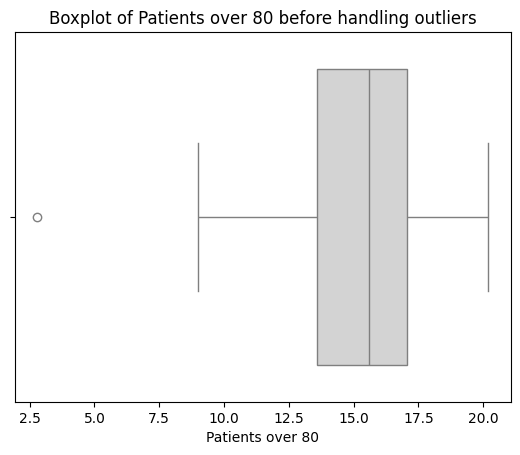

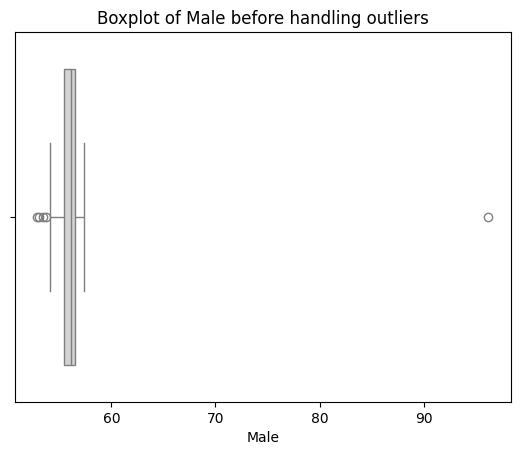

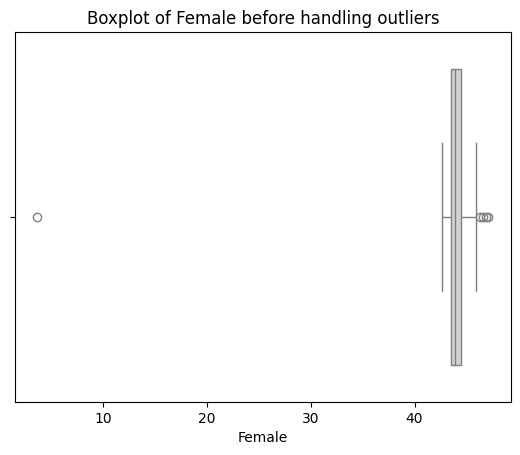

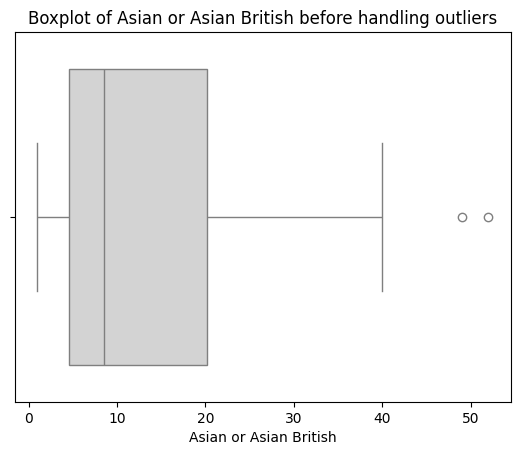

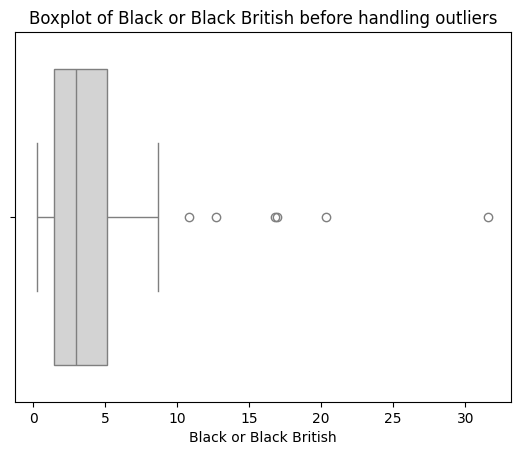

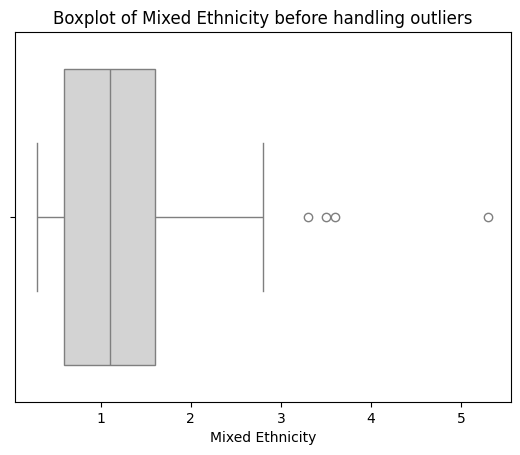

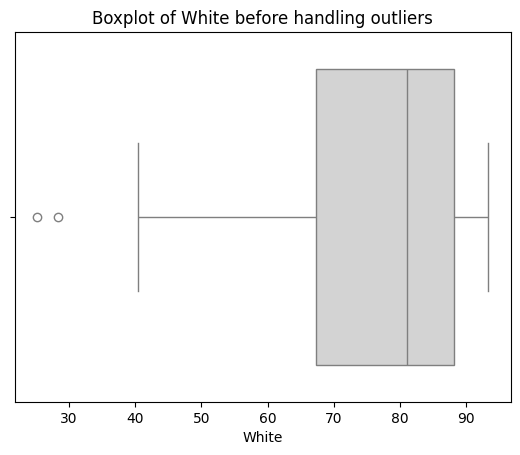

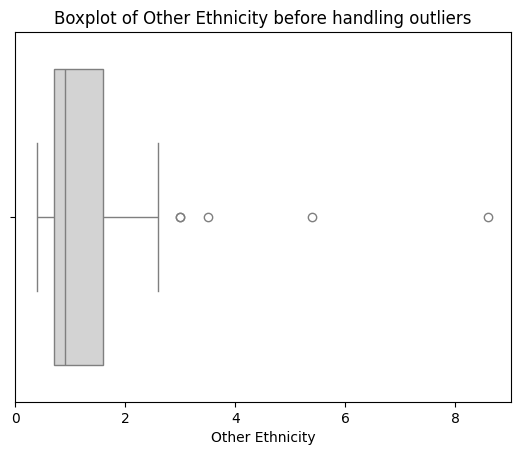

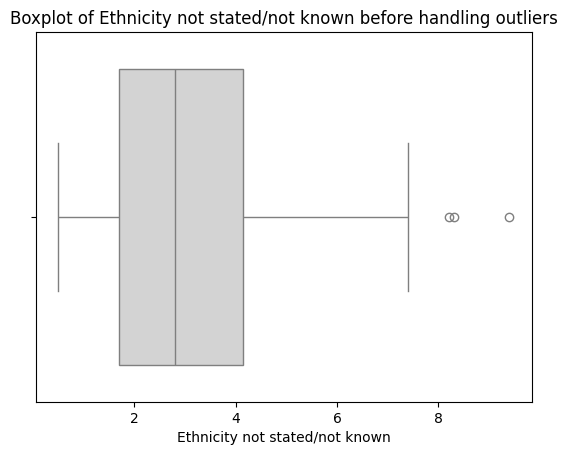

In [22]:
# Identify outliers for each column with numerical features
numerical_cols_registrations_icb = df_t2_registrations_icb.select_dtypes(include=["float64"]).columns

for col in df_t2_registrations_icb.columns:
    if col in numerical_cols_registrations_icb:
        sns.boxplot(data=df_t2_registrations_icb, x=col, color="lightgrey")
        plt.title(f"Boxplot of {col} before handling outliers")
        plt.show()

In [ ]:
# IQR to identify outliers in numerical columns

# Keep only numeric columns (float in this case)
df_num_reg_icb = df_t2_registrations_icb.select_dtypes(include=["float64"])

# IQR per column
Q1 = df_num_reg_icb.quantile(0.25)
Q3 = df_num_reg_icb.quantile(0.75)
IQR = Q3 - Q1

# Outlier mask (broadcasts per column)
outliers = (df_num_reg_icb < (Q1 - 1.5 * IQR)) | (df_num_reg_icb > (Q3 + 1.5 * IQR))

# Counts per column
print(outliers.sum())

Registered Patients               2
Patients under 40                 1
Patients between 40 and 60        1
Patients between 65 and 79        1
Patients over 80                  1
Male                              5
Female                            5
Asian or Asian British            2
Black or Black British            6
Mixed Ethnicity                   4
White                             2
Other Ethnicity                   5
Ethnicity not stated/not known    3
dtype: int64


## *1.2. Care Processes and Treatment Targets (Type 2 and other)*

In [25]:
# Use the 5th row as header as Excel file has blank/unnecesary data in the first few rows
df_t2_CP_TT = pd.read_excel("nda_2024_25.xlsx", sheet_name="Type 2 and other CP_TT", header=5)

df_t2_CP_TT.head()

,ICB code,ICB name,PCN code,PCN name,GP code,GP name,Numerator,Denominator,Percentage (HbA1c),Unnamed: 9,...,Denominator.19,Percentage All three treatment targets old,Unnamed: 87,Numerator.20,Denominator.20,Percentage All three treatment targets,Unnamed: 91,Numerator.21,Denominator.21,Percentage Continuous glucose monitoring
0,NaN,NaN,NaN,NaN,NaN,NaN,Number,Number,Per cent,NaN,...,Number,Per cent,NaN,Number,Number,Per cent,NaN,Number,Number,Per cent
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENGLAND,NaN,NaN,NaN,NaN,NaN,3439835,3753010,91.7,NaN,...,3238060,36,NaN,1469625,3238060,45.4,NaN,93470,156705,59.6
3,Q99,DETAINED ESTATES,NaN,NaN,NaN,NaN,4030,4465,90.3,NaN,...,3790,26.5,NaN,1550,3790,40.9,NaN,170,250,68
4,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,NaN,NaN,NaN,NaN,104225,115515,90.2,NaN,...,99010,36.3,NaN,44975,99010,45.4,NaN,3650,5180,70.5


In [26]:
# Drop rows 0 and 1 as they don't contain relevant data
df_t2_CP_TT = df_t2_CP_TT.drop([0, 1]).reset_index(drop=True)

df_t2_CP_TT.head()

,ICB code,ICB name,PCN code,PCN name,GP code,GP name,Numerator,Denominator,Percentage (HbA1c),Unnamed: 9,...,Denominator.19,Percentage All three treatment targets old,Unnamed: 87,Numerator.20,Denominator.20,Percentage All three treatment targets,Unnamed: 91,Numerator.21,Denominator.21,Percentage Continuous glucose monitoring
0,ENGLAND,NaN,NaN,NaN,NaN,NaN,3439835,3753010,91.7,NaN,...,3238060,36,NaN,1469625,3238060,45.4,NaN,93470,156705,59.6
1,Q99,DETAINED ESTATES,NaN,NaN,NaN,NaN,4030,4465,90.3,NaN,...,3790,26.5,NaN,1550,3790,40.9,NaN,170,250,68
2,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,NaN,NaN,NaN,NaN,104225,115515,90.2,NaN,...,99010,36.3,NaN,44975,99010,45.4,NaN,3650,5180,70.5
3,QF7,NHS SOUTH YORKSHIRE ICB,NaN,NaN,NaN,NaN,88205,94630,93.2,NaN,...,83445,37.1,NaN,38320,83445,45.9,NaN,2145,3505,61.2
4,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB,NaN,NaN,NaN,NaN,46600,50305,92.6,NaN,...,44080,36.6,NaN,20320,44080,46.1,NaN,2485,3110,79.9


In [27]:
# Show column names
df_t2_CP_TT.columns

Index(['ICB code', 'ICB name', 'PCN code', 'PCN name', 'GP code', 'GP name',
       'Numerator', 'Denominator', 'Percentage (HbA1c)', 'Unnamed: 9',
       'Numerator.1', 'Denominator.1', 'Percentage (BP)', 'Unnamed: 13',
       'Numerator.2', 'Denominator.2', 'Percentage (Col)', 'Unnamed: 17',
       'Numerator.3', 'Denominator.3', 'Percentage (SC)', 'Unnamed: 21',
       'Numerator.4', 'Denominator.4', 'Percentage (UA)', 'Unnamed: 25',
       'Unnamed: 26', 'Numerator.5', 'Denominator.5', 'Percentage (FS)',
       'Unnamed: 30', 'Numerator.6', 'Denominator.6', 'Percentage (BMI)',
       'Unnamed: 34', 'Numerator.7', 'Denominator.7', 'Percentage(smoking)',
       'Unnamed: 38', 'Numerator.8', 'Denominator.8', 'Percentage (all)',
       'Unnamed: 42', 'Unnamed: 43', 'Numerator.9', 'Denominator.9',
       'Percentage HbA1c <= 48 mmol/mol (6.5%)', 'Unnamed: 47', 'Numerator.10',
       'Denominator.10', 'Percentage HbA1c <= 53 mmol/mol (7.0%)',
       'Unnamed: 51', 'Numerator.11', 'Denomi

In [28]:
# Drop unnecessary columns
df_t2_CP_TT = df_t2_CP_TT.drop(columns=[
    "PCN code", "PCN name", "GP code", "GP name", "Numerator", 
    "Denominator", "Numerator.1", "Denominator.1", "Numerator.2", "Denominator.2", 
    "Numerator.3", "Denominator.3", "Numerator.4", "Denominator.4", "Numerator.5", 
    "Denominator.5", "Numerator.6", "Denominator.6", "Numerator.7", "Denominator.7", 
    "Numerator.8", "Denominator.8", "Numerator.9", "Denominator.9", "Numerator.10", 
    "Denominator.10", "Numerator.11", "Denominator.11", "Numerator.12", "Denominator.12", 
    "Numerator.13", "Denominator.13", "Numerator.14", "Denominator.14", "Numerator.15", 
    "Denominator.15", "Numerator.16", "Denominator.16", "Numerator.17", "Denominator.17", 
    "Numerator.18", "Denominator.18", "Numerator.19", "Denominator.19", "Numerator.20", 
    "Denominator.20", "Numerator.21", "Denominator.21", "Unnamed: 9", "Unnamed: 13", 
    "Unnamed: 17", "Unnamed: 21", "Unnamed: 25", "Unnamed: 26", "Unnamed: 30", "Unnamed: 34", 
    "Unnamed: 38", "Unnamed: 42", "Unnamed: 43", "Unnamed: 47", "Unnamed: 51", "Unnamed: 55", 
    "Unnamed: 59", "Unnamed: 63", "Unnamed: 67", "Unnamed: 71", "Unnamed: 75", "Unnamed: 79", 
    "Unnamed: 83", "Unnamed: 87", "Unnamed: 91", "Percentage HbA1c <= 48 mmol/mol (6.5%)", 
    "Percentage HbA1c <= 53 mmol/mol (7.0%)", "Percentage HbA1c <= 75 mmol/mol (9.0%)", 
    "Percentage HbA1c <= 86 mmol/mol (10.0%)", "Percentage Blood pressure <= 140/80 old", 
    "Percentage Primary prevention - on statins without CVD history", 
    "Percentage Secondary prevention - on statins with CVD history", 
    "Percentage All three treatment targets old"
])

df_t2_CP_TT.head()

,ICB code,ICB name,Percentage (HbA1c),Percentage (BP),Percentage (Col),Percentage (SC),Percentage (UA),Percentage (FS),Percentage (BMI),Percentage(smoking),Percentage (all),Percentage HbA1c <= 58 mmol/mol (7.5%),Percentage Blood pressure <= 140/90,Percentage Combined prevention - on statins,Percentage All three treatment targets,Percentage Continuous glucose monitoring
0,ENGLAND,NaN,91.7,91.7,86.9,91.2,68.1,77,86.4,94.2,57.6,65,83,78.2,45.4,59.6
1,Q99,DETAINED ESTATES,90.3,97.6,84.3,88.6,47.4,61.7,92.3,90.3,32.1,66.9,73.2,78,40.9,68
2,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,90.2,90.7,85,89.8,66.7,75.4,87,93.8,57,65.4,83.6,77.3,45.4,70.5
3,QF7,NHS SOUTH YORKSHIRE ICB,93.2,92.5,87.7,92,61.2,78,85,93.8,51,63.5,83.5,81.3,45.9,61.2
4,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB,92.6,91.7,87.8,92.6,66.4,78.2,87.2,93.2,58.5,66.6,82.9,76.3,46.1,79.9


In [29]:
# Rename columns for clarity
df_t2_CP_TT = df_t2_CP_TT.rename(columns={
    "Percentage (HbA1c)": "HbA1c",
    "Percentage (BP)": "Blood Pressure",
    "Percentage (Col)": "Cholesterol",
    "Percentage (SC)": "Serum Creatinine",
    "Percentage (UA)": "Urine Albumin",
    "Percentage (FS)": "Foot Surveillance",
    "Percentage (BMI)": "BMI",
    "Percentage(smoking)": "Smoking",
    "Percentage (all)": "All 8 Care Processes",
    "Percentage HbA1c <= 58 mmol/mol (7.5%)": "HbA1c <= 58 mmol/mol",
    "Percentage Blood pressure <= 140/90": "Blood Pressure <= 140/90",
    "Percentage Combined prevention - on statins": "Statins Combined",
    "Percentage All three treatment targets": "All 3 Treatment Targets",
    "Percentage Continuous glucose monitoring": "Continuous Glucose Monitoring"
})

df_t2_CP_TT.head()

,ICB code,ICB name,HbA1c,Blood Pressure,Cholesterol,Serum Creatinine,Urine Albumin,Foot Surveillance,BMI,Smoking,All 8 Care Processes,HbA1c <= 58 mmol/mol,Blood Pressure <= 140/90,Statins Combined,All 3 Treatment Targets,Continuous Glucose Monitoring
0,ENGLAND,NaN,91.7,91.7,86.9,91.2,68.1,77,86.4,94.2,57.6,65,83,78.2,45.4,59.6
1,Q99,DETAINED ESTATES,90.3,97.6,84.3,88.6,47.4,61.7,92.3,90.3,32.1,66.9,73.2,78,40.9,68
2,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,90.2,90.7,85,89.8,66.7,75.4,87,93.8,57,65.4,83.6,77.3,45.4,70.5
3,QF7,NHS SOUTH YORKSHIRE ICB,93.2,92.5,87.7,92,61.2,78,85,93.8,51,63.5,83.5,81.3,45.9,61.2
4,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB,92.6,91.7,87.8,92.6,66.4,78.2,87.2,93.2,58.5,66.6,82.9,76.3,46.1,79.9


In [30]:
# Show the data types of each column
df_t2_CP_TT.dtypes

ICB code                         object
ICB name                         object
HbA1c                            object
Blood Pressure                   object
Cholesterol                      object
Serum Creatinine                 object
Urine Albumin                    object
Foot Surveillance                object
BMI                              object
Smoking                          object
All 8 Care Processes             object
HbA1c <= 58 mmol/mol             object
Blood Pressure <= 140/90         object
Statins Combined                 object
All 3 Treatment Targets          object
Continuous Glucose Monitoring    object
dtype: object

In [31]:
# Change data types of numerical columns to float (excluding first two columns)
numerical_cols_CP_CT = df_t2_CP_TT.columns[2:]

# Replace string "u" with NaN, then convert to float
df_t2_CP_TT[numerical_cols_CP_CT] = (
    df_t2_CP_TT[numerical_cols_CP_CT]
    .replace(["u"], np.nan)
    .astype(float)
)

# Verify the changes
df_t2_CP_TT.dtypes

/var/folders/lc/7r_ggnyj6zd06q387npnt7zr0000gn/T/ipykernel_1121/4136529217.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(["u"], np.nan)


ICB code                          object
ICB name                          object
HbA1c                            float64
Blood Pressure                   float64
Cholesterol                      float64
Serum Creatinine                 float64
Urine Albumin                    float64
Foot Surveillance                float64
BMI                              float64
Smoking                          float64
All 8 Care Processes             float64
HbA1c <= 58 mmol/mol             float64
Blood Pressure <= 140/90         float64
Statins Combined                 float64
All 3 Treatment Targets          float64
Continuous Glucose Monitoring    float64
dtype: object

### *1.2.1. Type 2 and Other Care Processes and Treatment Targets (National level)*

In [32]:
# Create a new DataFrame (National level) and reset index
df_t2_CP_TT_england = df_t2_CP_TT.iloc[[0]].reset_index(drop=True)

# Drop the 'ICB name' column as it's not needed for national level
df_t2_CP_TT_england = df_t2_CP_TT_england.drop(columns=["ICB name"])

df_t2_CP_TT_england.head()

,ICB code,HbA1c,Blood Pressure,Cholesterol,Serum Creatinine,Urine Albumin,Foot Surveillance,BMI,Smoking,All 8 Care Processes,HbA1c <= 58 mmol/mol,Blood Pressure <= 140/90,Statins Combined,All 3 Treatment Targets,Continuous Glucose Monitoring
0,ENGLAND,91.7,91.7,86.9,91.2,68.1,77.0,86.4,94.2,57.6,65.0,83.0,78.2,45.4,59.6


In [33]:
# Check the shape of the DataFrame
df_t2_CP_TT_england.shape

(1, 15)

In [35]:
# Check for null values
df_t2_CP_TT_england.isnull().sum()

ICB code                         0
HbA1c                            0
Blood Pressure                   0
Cholesterol                      0
Serum Creatinine                 0
Urine Albumin                    0
Foot Surveillance                0
BMI                              0
Smoking                          0
All 8 Care Processes             0
HbA1c <= 58 mmol/mol             0
Blood Pressure <= 140/90         0
Statins Combined                 0
All 3 Treatment Targets          0
Continuous Glucose Monitoring    0
dtype: int64

### *1.2.2. Type 2 and Other Care Processes and Treatment Targets (ICB level)*

In [36]:
# Create a new DataFrame (ICB level) and reset index
df_t2_CP_TT_icb = df_t2_CP_TT.iloc[1:44].reset_index(drop=True)

df_t2_CP_TT_icb.head()

,ICB code,ICB name,HbA1c,Blood Pressure,Cholesterol,Serum Creatinine,Urine Albumin,Foot Surveillance,BMI,Smoking,All 8 Care Processes,HbA1c <= 58 mmol/mol,Blood Pressure <= 140/90,Statins Combined,All 3 Treatment Targets,Continuous Glucose Monitoring
0,Q99,DETAINED ESTATES,90.3,97.6,84.3,88.6,47.4,61.7,92.3,90.3,32.1,66.9,73.2,78.0,40.9,68.0
1,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,90.2,90.7,85.0,89.8,66.7,75.4,87.0,93.8,57.0,65.4,83.6,77.3,45.4,70.5
2,QF7,NHS SOUTH YORKSHIRE ICB,93.2,92.5,87.7,92.0,61.2,78.0,85.0,93.8,51.0,63.5,83.5,81.3,45.9,61.2
3,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB,92.6,91.7,87.8,92.6,66.4,78.2,87.2,93.2,58.5,66.6,82.9,76.3,46.1,79.9
4,QH8,NHS MID AND SOUTH ESSEX ICB,88.7,90.9,83.8,89.0,50.0,74.9,79.4,92.7,37.9,68.0,83.4,78.8,48.6,63.8


In [37]:
# Show the last few rows of the DataFrame (ICB level)
df_t2_CP_TT_icb.tail()

,ICB code,ICB name,HbA1c,Blood Pressure,Cholesterol,Serum Creatinine,Urine Albumin,Foot Surveillance,BMI,Smoking,All 8 Care Processes,HbA1c <= 58 mmol/mol,Blood Pressure <= 140/90,Statins Combined,All 3 Treatment Targets,Continuous Glucose Monitoring
38,QWE,NHS SOUTH WEST LONDON ICB,90.9,90.3,86.3,90.1,72.9,78.1,84.5,94.7,61.7,64.6,84.9,76.0,44.9,38.8
39,QWO,NHS WEST YORKSHIRE ICB,92.7,92.5,87.5,91.7,67.9,75.1,86.7,94.8,54.2,62.2,83.0,78.0,43.0,63.4
40,QWU,NHS COVENTRY AND WARWICKSHIRE ICB,90.6,89.8,83.3,88.9,59.4,73.2,81.8,91.6,44.9,66.9,83.3,77.9,47.0,71.6
41,QXU,NHS SURREY HEARTLANDS ICB,91.8,91.4,87.5,91.7,71.6,76.2,86.2,93.5,61.1,67.5,82.1,76.2,46.2,41.0
42,QYG,NHS CHESHIRE AND MERSEYSIDE ICB,90.5,90.0,84.6,90.1,61.3,72.5,83.9,92.5,49.1,65.6,83.0,78.0,46.1,74.7


In [38]:
# Check the shape of the DataFrame
df_t2_CP_TT_icb.shape

(43, 16)

In [39]:
# Check for duplicates
df_t2_CP_TT_icb.duplicated().sum()

np.int64(0)

In [40]:
# Check for null values
df_t2_CP_TT_icb.isnull().sum()

ICB code                         0
ICB name                         0
HbA1c                            0
Blood Pressure                   0
Cholesterol                      0
Serum Creatinine                 0
Urine Albumin                    0
Foot Surveillance                0
BMI                              0
Smoking                          0
All 8 Care Processes             0
HbA1c <= 58 mmol/mol             0
Blood Pressure <= 140/90         0
Statins Combined                 0
All 3 Treatment Targets          0
Continuous Glucose Monitoring    0
dtype: int64

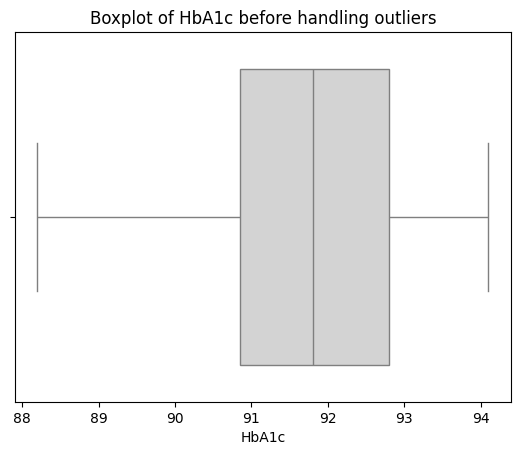

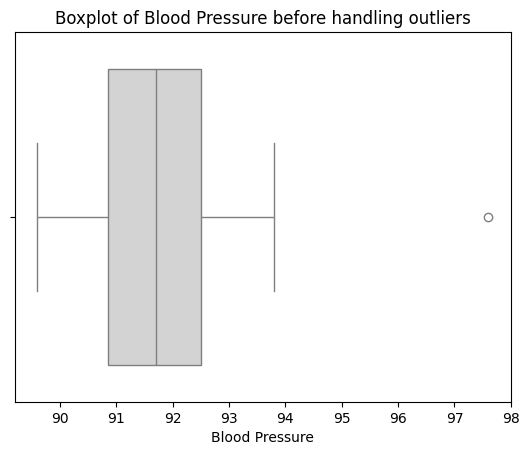

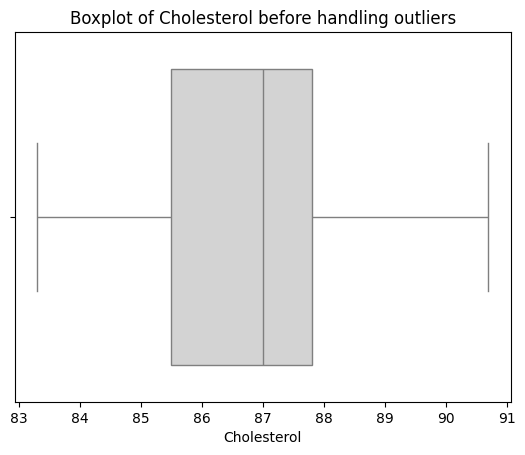

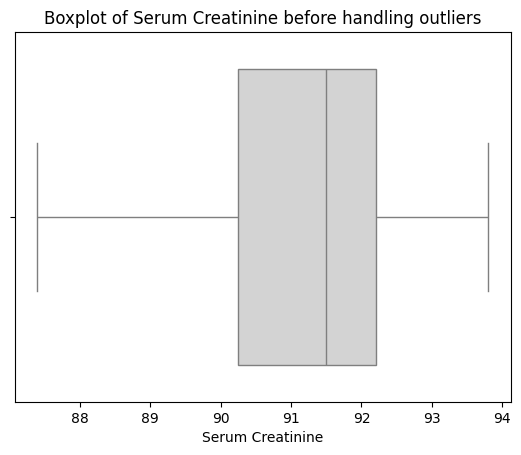

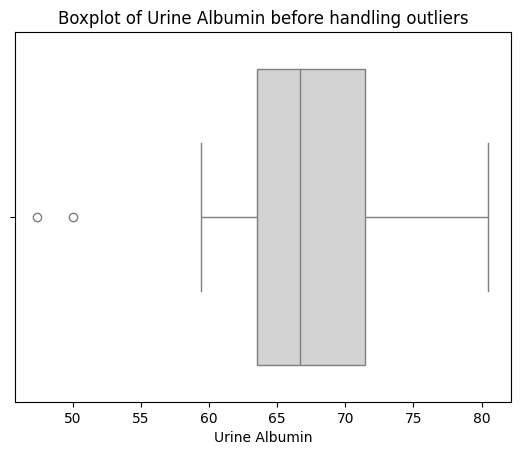

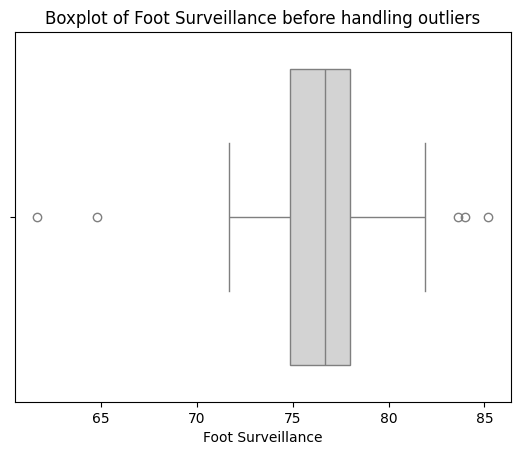

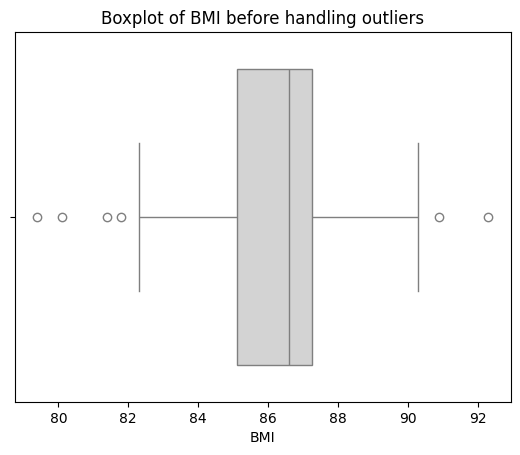

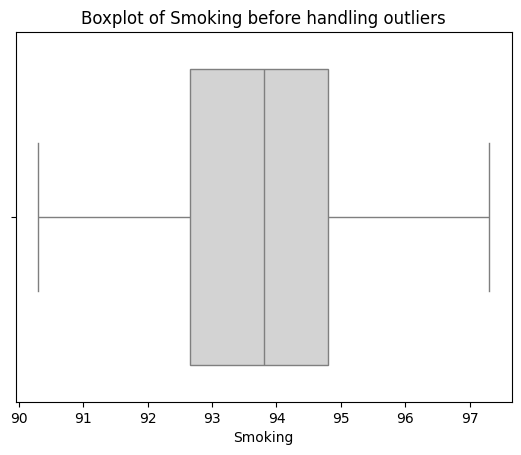

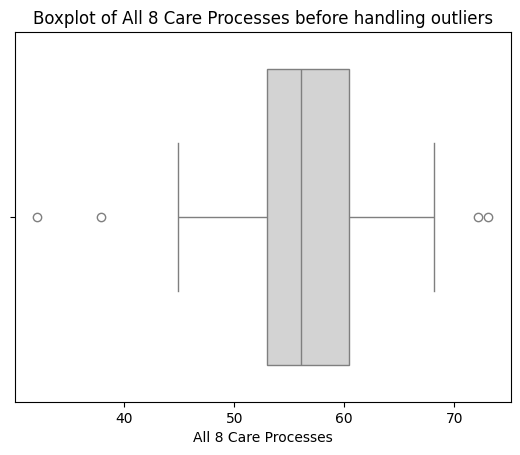

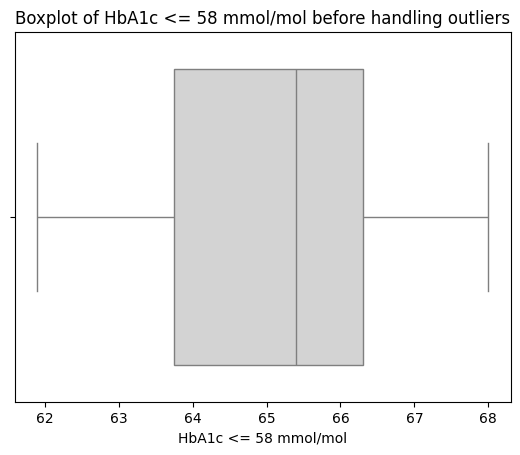

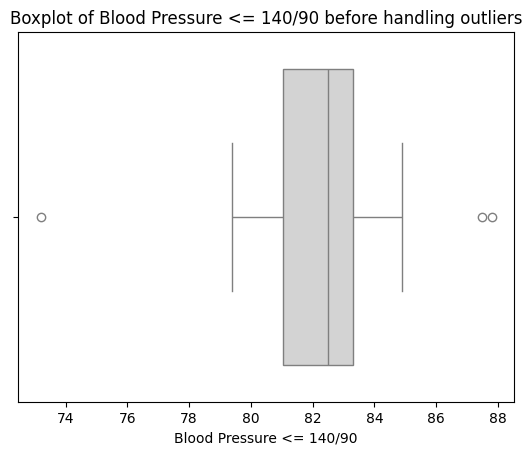

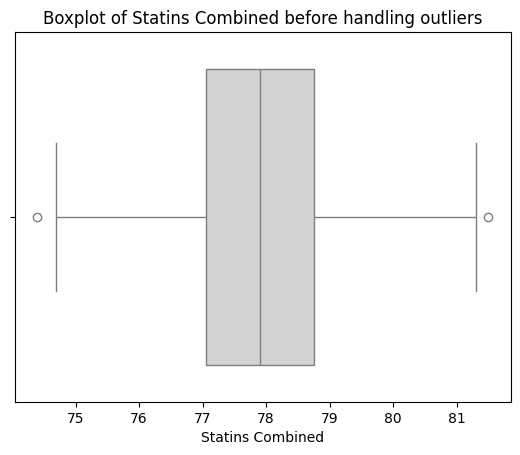

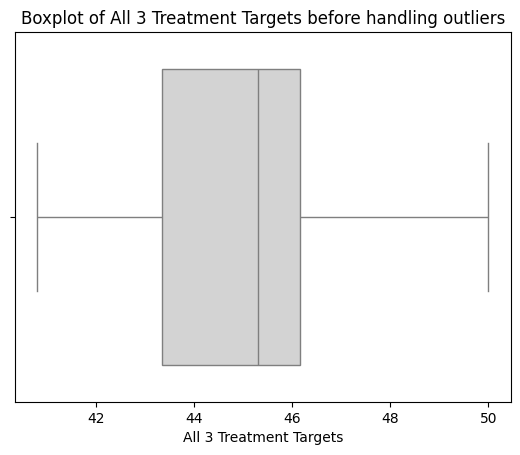

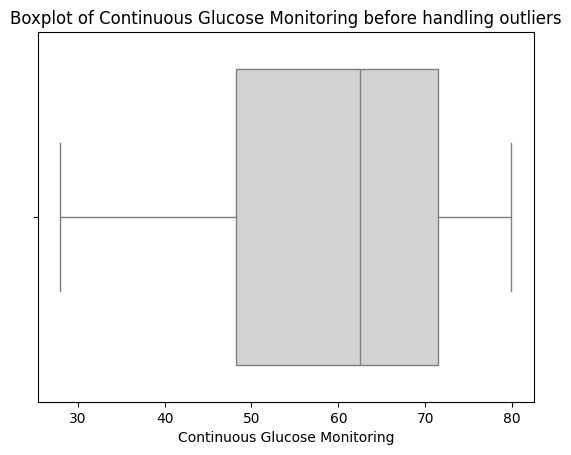

In [41]:
# Identify outliers for each column with numerical features
numerical_cols_CP_CT_icb = df_t2_CP_TT_icb.select_dtypes(include=["int64", "float64"]).columns

for col in df_t2_CP_TT_icb.columns:
    if col in numerical_cols_CP_CT_icb:
        sns.boxplot(data=df_t2_CP_TT_icb, x=col, color="lightgrey")
        plt.title(f"Boxplot of {col} before handling outliers")
        plt.show()

In [42]:
# IQR to identify outliers in numerical columns

# Keep only numeric columns (float in this case)
df_num_CP_TT_icb = df_t2_CP_TT_icb.select_dtypes(include=["float64", "int64"])

# IQR per column
Q1 = df_num_CP_TT_icb.quantile(0.25)
Q3 = df_num_CP_TT_icb.quantile(0.75)
IQR = Q3 - Q1

# Outlier mask (broadcasts per column)
outliers = (df_num_CP_TT_icb < (Q1 - 1.5 * IQR)) | (df_num_CP_TT_icb > (Q3 + 1.5 * IQR))

# Counts per column
print(outliers.sum())

HbA1c                            0
Blood Pressure                   1
Cholesterol                      0
Serum Creatinine                 0
Urine Albumin                    2
Foot Surveillance                5
BMI                              6
Smoking                          0
All 8 Care Processes             4
HbA1c <= 58 mmol/mol             0
Blood Pressure <= 140/90         3
Statins Combined                 2
All 3 Treatment Targets          0
Continuous Glucose Monitoring    0
dtype: int64


#### **Comment about Outliers**

*Outliers were identified at the Integrated Care Board (ICB) level using the interquartile range method. These were not excluded or transformed, as each value represents a genuine aggregated outcome for a regional population rather than an error or anomaly. Retaining these observations is important to capture the full range of variation across ICBs, including areas with particularly high or low performance, which may reflect meaningful differences in demographics, health needs, or service provision. Outliers are therefore reported but not managed, in order to preserve the integrity of the dataset.*

---

# 2. Analysis

## *2.1. Prevalence of Type 2 Diabetes*

Prevalence shows the number of registered patients with Type 2 diabetes across England. Understanding both the national burden and the variation between Integrated Care Boards (ICBs) is important for resource planning and service delivery. Here, we compare the national outcome with variation across ICBs.

In [43]:
total_patients_type2 = df_t2_registrations_england["Registered Patients"][0]
print(f"Total number of patients registered with type 2 diabetes in England: {total_patients_type2}")

Total number of patients registered with type 2 diabetes in England: 3753010.0


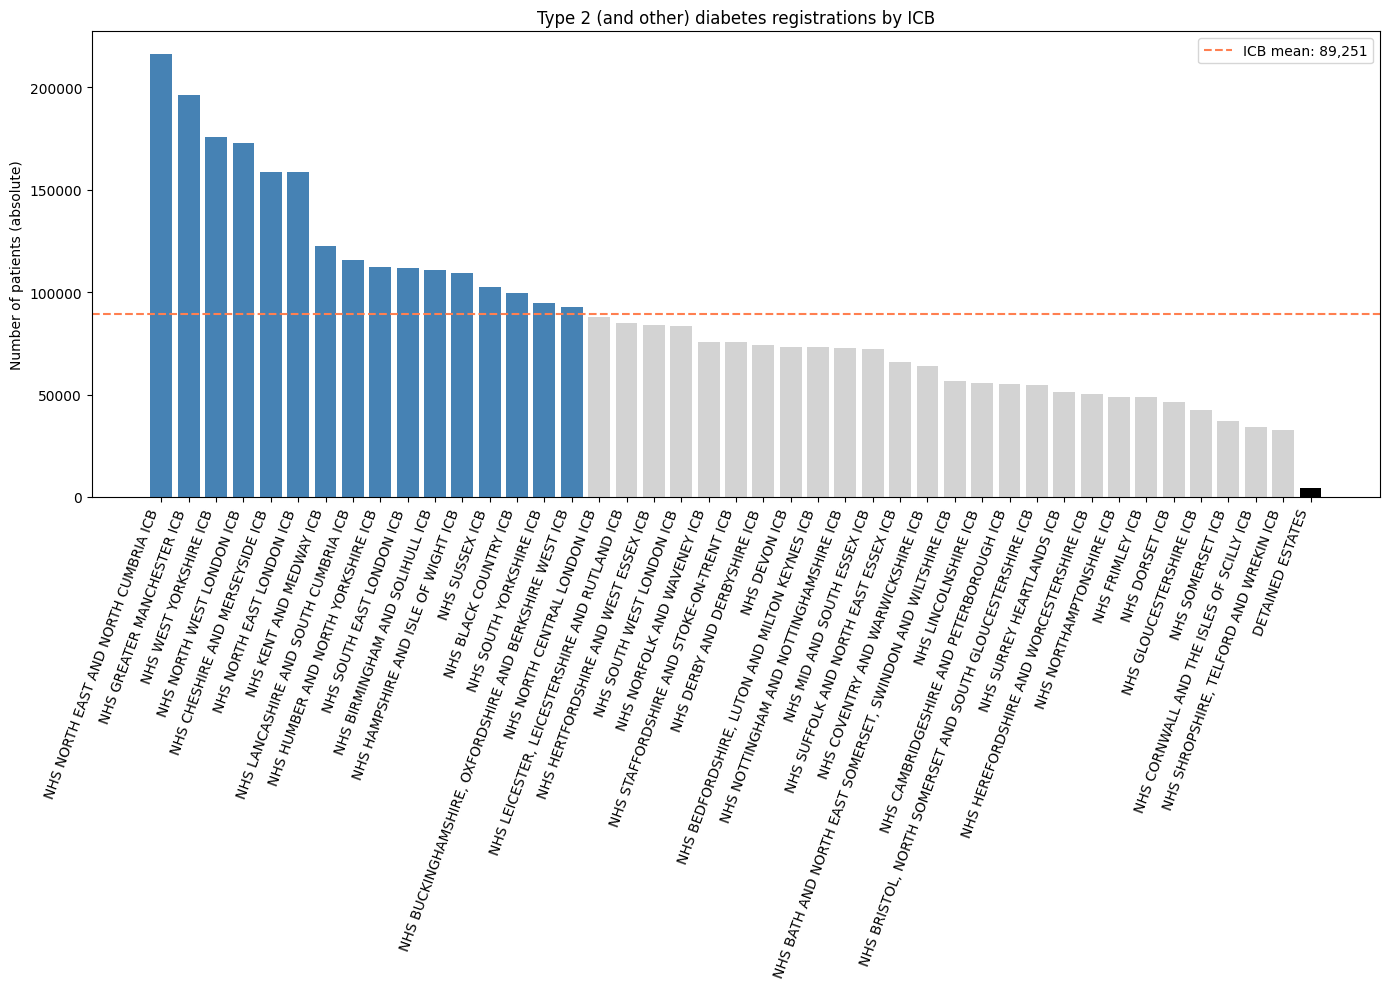

In [44]:
# Sort by registrations
icb_reg_sorted = df_t2_registrations_icb.sort_values("Registered Patients", ascending=False)

# Calculate mean excluding 'DETAINED ESTATES'
icb_reg_mean = icb_reg_sorted.loc[
    icb_reg_sorted["ICB name"] != "DETAINED ESTATES", "Registered Patients"
].mean()

# Create a list of colours
colors = []
for icb_name, val in zip(icb_reg_sorted["ICB name"], icb_reg_sorted["Registered Patients"]):
    if icb_name == "DETAINED ESTATES":
        colors.append("black")
    elif val >= icb_reg_mean:
        colors.append("steelblue")
    else:
        colors.append("lightgrey")

# Plot the bar chart
plt.figure(figsize=(14, 10))
plt.bar(icb_reg_sorted["ICB name"], icb_reg_sorted["Registered Patients"], color=colors)

plt.axhline(icb_reg_mean, color="coral", linestyle="--", 
            label=f"ICB mean: {icb_reg_mean:,.0f}")

plt.title("Type 2 (and other) diabetes registrations by ICB")
plt.ylabel("Number of patients (absolute)")
plt.xticks(rotation=70, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

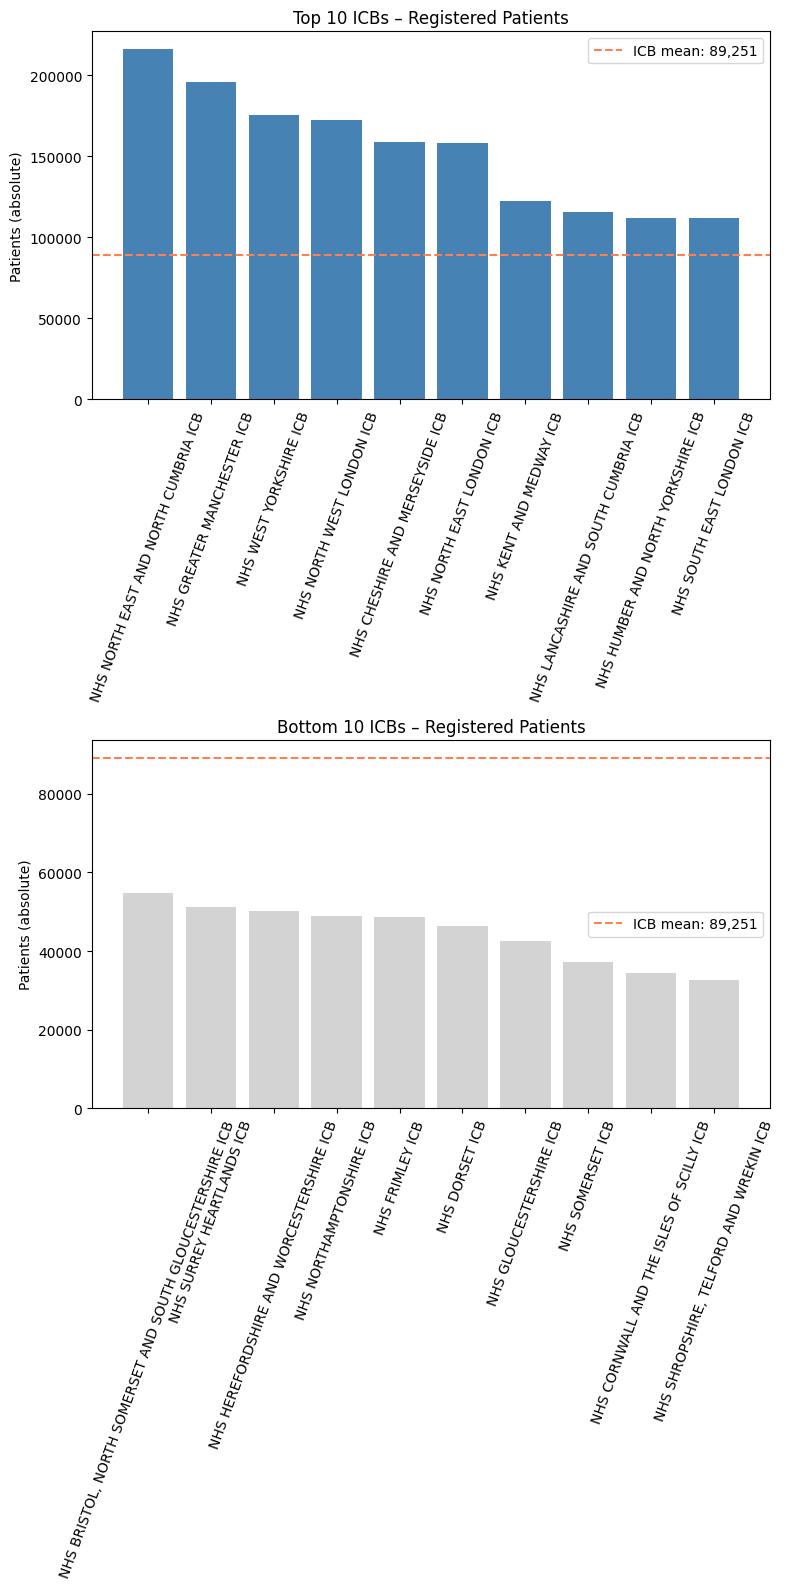

In [45]:
# Define top and bottom 10 ICBs
top10 = icb_reg_sorted.head(10)
bottom10 = icb_reg_sorted.iloc[-11:-1]

fig, axes = plt.subplots(2, 1, figsize=(8, 16))

# Plot Top 10 ICBs
axes[0].bar(top10["ICB name"], top10["Registered Patients"], color="steelblue")
axes[0].axhline(icb_reg_mean, color="coral", linestyle="--", 
                label=f"ICB mean: {icb_reg_mean:,.0f}")
axes[0].set_title("Top 10 ICBs – Registered Patients")
axes[0].set_ylabel("Patients (absolute)")
axes[0].legend()
axes[0].tick_params(axis="x", rotation=70)

# Plot Bottom 10 ICBs
axes[1].bar(bottom10["ICB name"], bottom10["Registered Patients"], color="lightgrey")
axes[1].axhline(icb_reg_mean, color="coral", linestyle="--", 
                label=f"ICB mean: {icb_reg_mean:,.0f}")
axes[1].set_title("Bottom 10 ICBs – Registered Patients")
axes[1].set_ylabel("Patients (absolute)")
axes[1].legend()
axes[1].tick_params(axis="x", rotation=70)

plt.tight_layout()
plt.show()

In [46]:
# Exclude 'DETAINED ESTATES' from stats
icb_reg_stats = icb_reg_sorted[icb_reg_sorted["ICB name"] != "DETAINED ESTATES"]

# Count ICBs above/below mean
above = (icb_reg_stats["Registered Patients"] > icb_reg_mean).sum()
below = (icb_reg_stats["Registered Patients"] < icb_reg_mean).sum()

# Best & worst ICBs
best_icb = icb_reg_stats.iloc[0]
worst_icb = icb_reg_stats.iloc[-1]

gap = best_icb["Registered Patients"] - worst_icb["Registered Patients"]

print(f"ICBs above mean: {above}")
print(f"ICBs below mean: {below}")
print(f"Highest: {best_icb["ICB name"]} ({best_icb["Registered Patients"]:,})")
print(f"Lowest: {worst_icb["ICB name"]} ({worst_icb["Registered Patients"]:,})")
print(f"Gap between best and worst: {gap:,} patients")

ICBs above mean: 16
ICBs below mean: 26
Highest: NHS NORTH EAST AND NORTH CUMBRIA ICB (216,380.0)
Lowest: NHS SHROPSHIRE, TELFORD AND WREKIN ICB (32,550.0)
Gap between best and worst: 183,830.0 patients


#### **Analysis – Prevalence**
- Total number of patients registered with type 2 diabetes in England (KPI): **3,753,010**

- Across England, the average ICB has ~87,000 patients with Type 2 diabetes. However, the largest ICB (North East & North Cumbria) has more than 200,000 patients — over double the average. In contrast, several smaller ICBs report fewer than 50,000 patients. This variation highlights differences in population size and disease burden across the country.

- Because denominators (total population size per ICB) are not available in this dataset, these figures should be interpreted as absolute burden rather than true prevalence rates.

- 16 ICBs are above the mean (87,000 patients), while 26 fall below.

- The largest register is NHS North East & North Cumbria with 216,380 patients, compared with just 32,550 in NHS Shropshire, Telford and Wrekin ICB.

- That’s a gap of over 183,830 patients between the largest and smallest ICBs.

## *2.2. Delivery of Care Processes*

NICE recommends that every person with diabetes receives 8 key annual care processes, covering monitoring of blood sugar, blood pressure, cholesterol, kidney function, foot health, weight, and smoking. These checks are essential to prevent complications. This section examines delivery rates nationally and highlights variation across ICBs.

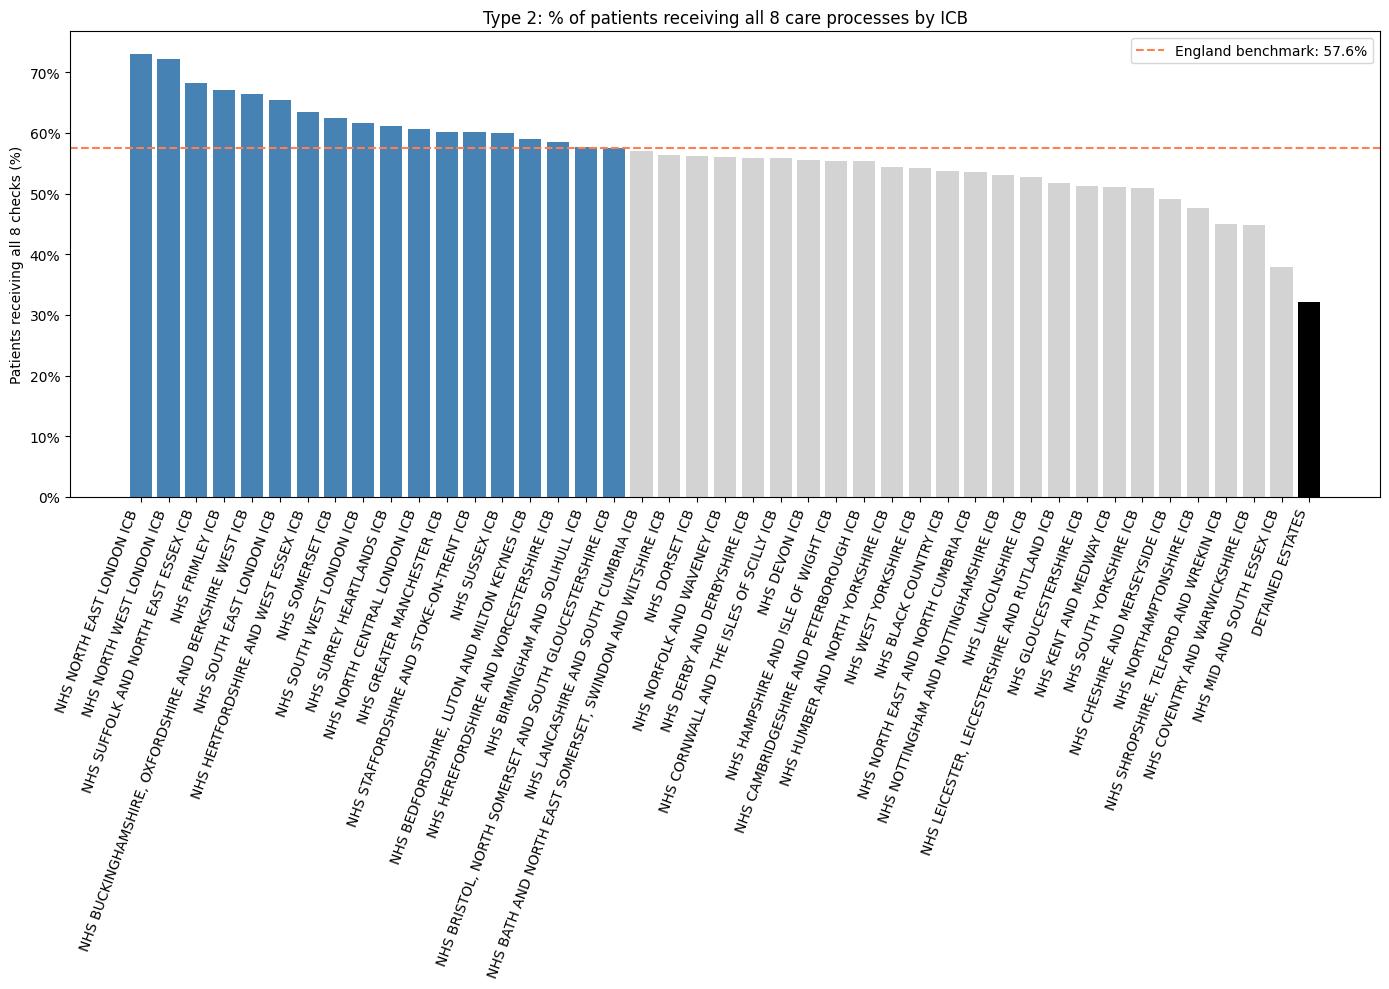

In [47]:
# Import PercentFormatter
from matplotlib.ticker import PercentFormatter

# Sort by registrations
icb_cp_sorted = df_t2_CP_TT_icb.sort_values("All 8 Care Processes", ascending=False)

all_cp_england = df_t2_CP_TT_england["All 8 Care Processes"][0]

# Create a list of colours
colors = []
for icb_name, val in zip(icb_cp_sorted["ICB name"], icb_cp_sorted["All 8 Care Processes"]):
    if icb_name == "DETAINED ESTATES":
        colors.append("black")
    elif val >= all_cp_england:
        colors.append("steelblue")
    else:
        colors.append("lightgrey")

# Plot the bar chart
plt.figure(figsize=(14, 10))
plt.bar(icb_cp_sorted["ICB name"], icb_cp_sorted["All 8 Care Processes"], color=colors)

# National benchmark line
plt.axhline(all_cp_england, color="coral", linestyle="--", 
            label=f"England benchmark: {all_cp_england:.1f}%")

plt.title("Type 2: % of patients receiving all 8 care processes by ICB")
plt.ylabel("Patients receiving all 8 checks (%)")
plt.xticks(rotation=70, ha="right")
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.legend()
plt.tight_layout()
plt.show()

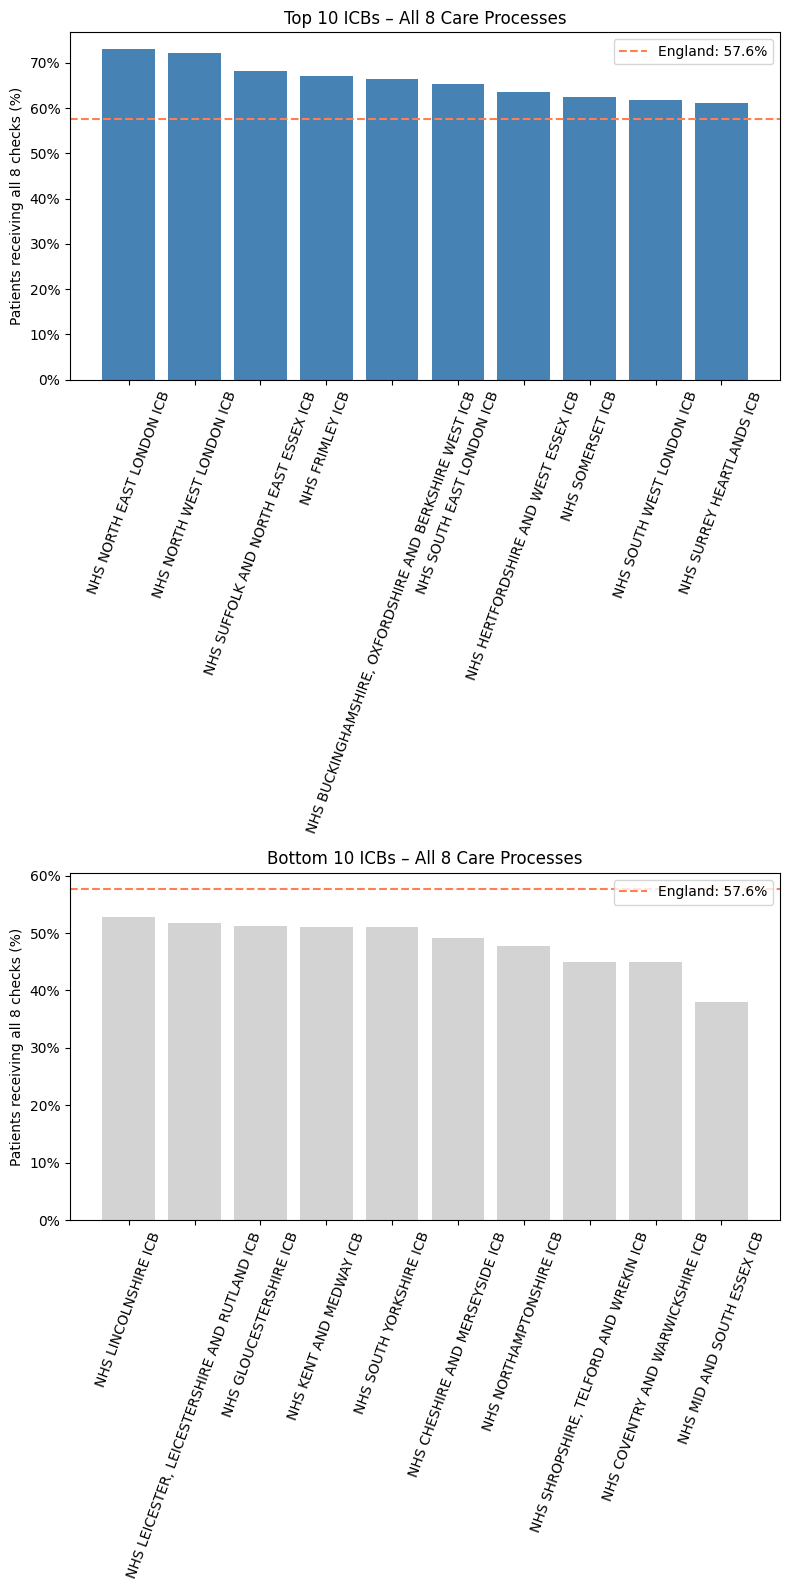

In [48]:
# Exclude 'DETAINED ESTATES' from stats
icb_cp_filtered = icb_cp_sorted[icb_cp_sorted["ICB name"] != "DETAINED ESTATES"]

# Select top/bottom 10
top10 = icb_cp_filtered.head(10)
bottom10 = icb_cp_filtered.tail(10)

fig, axes = plt.subplots(2, 1, figsize=(8, 16))

# Plot the Top 10 ICBs
axes[0].bar(top10["ICB name"], top10["All 8 Care Processes"], color="steelblue")
axes[0].axhline(all_cp_england, color="coral", linestyle="--", 
                label=f"England: {all_cp_england:.1f}%")
axes[0].set_title("Top 10 ICBs – All 8 Care Processes")
axes[0].set_ylabel("Patients receiving all 8 checks (%)")
axes[0].legend()
axes[0].tick_params(axis="x", rotation=70)

# Plot the Bottom 10 ICBs
axes[1].bar(bottom10["ICB name"], bottom10["All 8 Care Processes"], color="lightgrey")
axes[1].axhline(all_cp_england, color="coral", linestyle="--", 
                label=f"England: {all_cp_england:.1f}%")
axes[1].set_title("Bottom 10 ICBs – All 8 Care Processes")
axes[1].set_ylabel("Patients receiving all 8 checks (%)")
axes[1].legend()
axes[1].tick_params(axis="x", rotation=70)

# Format y-axis as %
for ax in axes:
    ax.yaxis.set_major_formatter(PercentFormatter(100))

plt.tight_layout()
plt.show()

In [49]:
# Exclude 'DETAINED ESTATES' from stats
icb_cp_stats = icb_cp_sorted[icb_cp_sorted["ICB name"] != "DETAINED ESTATES"]

# Count ICBs above/below England benchmark
above = (icb_cp_stats["All 8 Care Processes"] > all_cp_england).sum()
below = (icb_cp_stats["All 8 Care Processes"] < all_cp_england).sum()

# Best & worst ICBs
best_icb = icb_cp_stats.iloc[0]
worst_icb = icb_cp_stats.iloc[-1]

gap = best_icb["All 8 Care Processes"] - worst_icb["All 8 Care Processes"]

print(f"ICBs above national benchmark: {above}")
print(f"ICBs below national benchmark: {below}")
print(f"Highest: {best_icb['ICB name']} ({best_icb["All 8 Care Processes"]:.1f}%)")
print(f"Lowest: {worst_icb['ICB name']} ({worst_icb["All 8 Care Processes"]:.1f}%)")
print(f"Gap between best and worst: {gap:.1f} percentage points")

ICBs above national benchmark: 17
ICBs below national benchmark: 24
Highest: NHS NORTH EAST LONDON ICB (73.1%)
Lowest: NHS MID AND SOUTH ESSEX ICB (37.9%)
Gap between best and worst: 35.2 percentage points


#### **Analysis – Care Processes**

- Nationally, 57.6% of Type 2 patients received all 8 recommended care processes. This means that nearly half of patients are missing at least one of the NICE-mandated annual checks.
- Across ICBs, performance varies widely. The best-performing ICB is NHS North East London with 73.1%, while the lowest is NHS Mid and South Essex with 32.1% — a gap of 35.2 percentage points in care quality across England.
- **Benchmarking:** 17 ICBs are above the national average, while 25 are below. This highlights how unevenly care processes are delivered across regions.
- **Implication:** Improving uptake of the full care process bundle represents a major opportunity for quality improvement. Supporting lower-performing ICBs to reach the national benchmark could significantly raise overall care standards and reduce inequalities.

## *2.3. Achievement of Treatment Targets*

Beyond monitoring, patients should achieve treatment targets: good glycaemic control (HbA1c ≤58 mmol/mol), blood pressure control (≤140/90), and prescription of statins for cardiovascular prevention. Achieving all three reduces risk of long-term complications. Here, we assess how many patients meet each target and the overall proportion achieving all three.

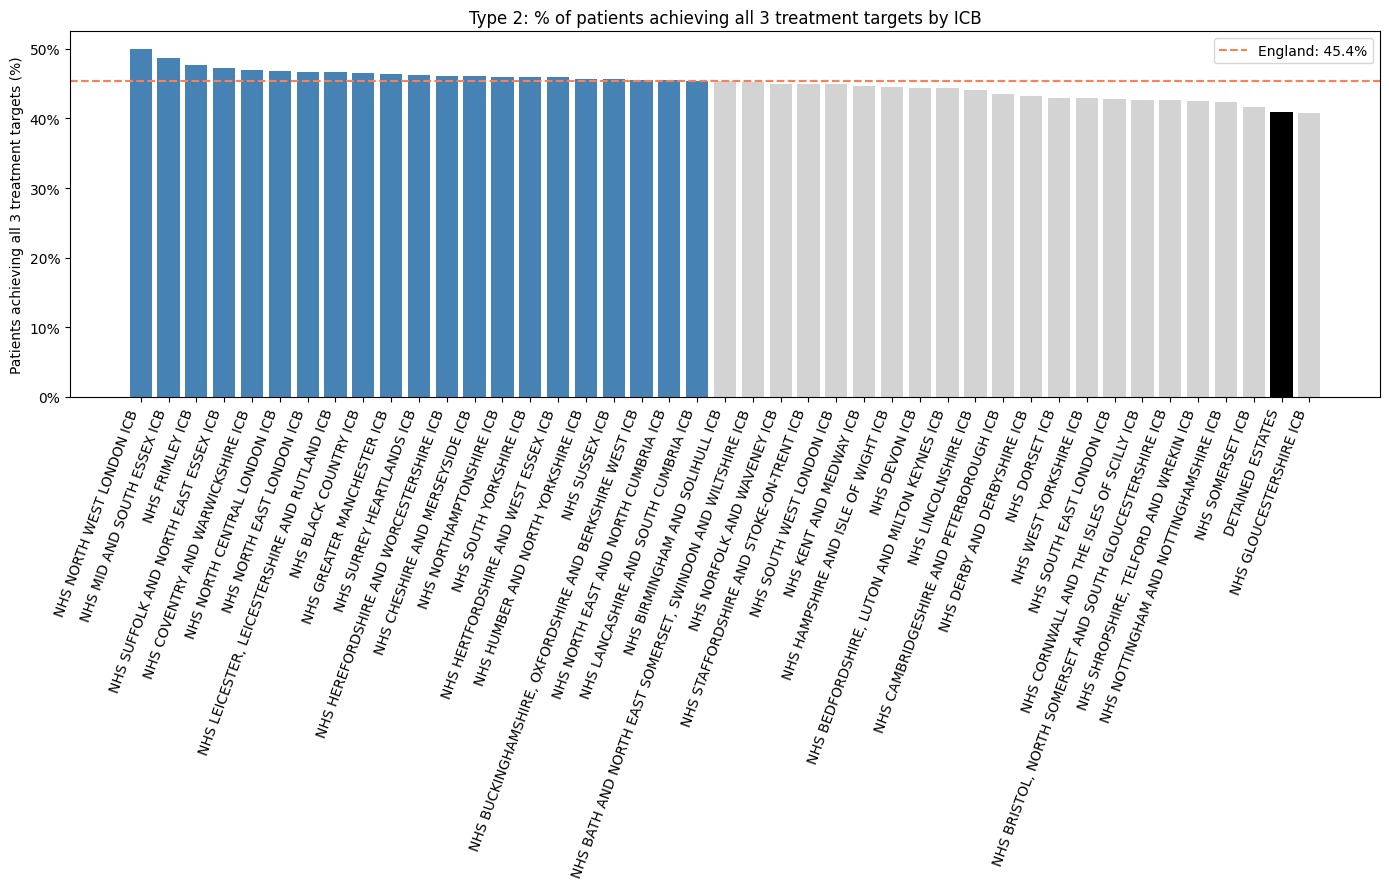

In [50]:
# Define data for plotting
icb_tt = df_t2_CP_TT_icb[["ICB name", "All 3 Treatment Targets"]].copy()
all_tt_england = df_t2_CP_TT_england["All 3 Treatment Targets"][0]
icb_tt_sorted = icb_tt.sort_values("All 3 Treatment Targets", ascending=False)

# Create a list of colours
colors = []
for icb_name, val in zip(icb_tt_sorted["ICB name"], icb_tt_sorted["All 3 Treatment Targets"]):
    if icb_name == "DETAINED ESTATES":
        colors.append("black")
    elif val >= all_tt_england:
        colors.append("steelblue")
    else:
        colors.append("lightgrey")

# Plot all 3 treatment targets by ICB
plt.figure(figsize=(14, 9))
plt.bar(icb_tt_sorted["ICB name"], icb_tt_sorted["All 3 Treatment Targets"], color=colors)
plt.axhline(all_tt_england, color="coral", linestyle="--", 
            label=f"England: {all_tt_england:.1f}%")

plt.title("Type 2: % of patients achieving all 3 treatment targets by ICB")
plt.ylabel("Patients achieving all 3 treatment targets (%)")
plt.xticks(rotation=70, ha="right")
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.legend()
plt.tight_layout()
plt.show()

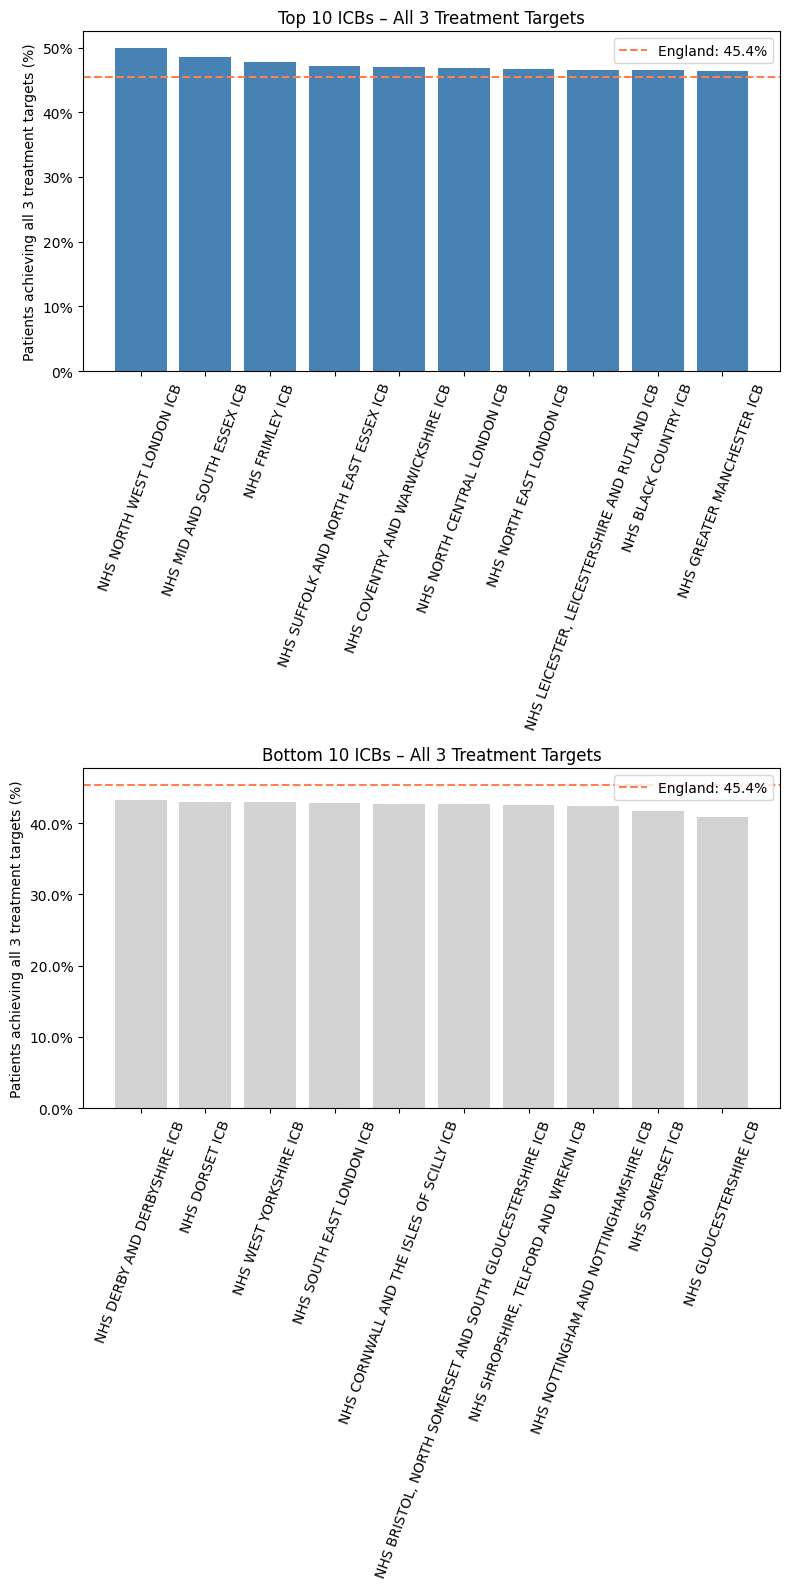

In [51]:
# Exclude 'DETAINED ESTATES' from stats
icb_tt_filtered = icb_tt_sorted[icb_tt_sorted["ICB name"] != "DETAINED ESTATES"]

# Select top and bottom 10
top10 = icb_tt_filtered.head(10)
bottom10 = icb_tt_filtered.tail(10)

fig, axes = plt.subplots(2, 1, figsize=(8, 16))

# Plot the Top 10 ICBs
axes[0].bar(top10["ICB name"], top10["All 3 Treatment Targets"], color="steelblue")
axes[0].axhline(all_tt_england, color="coral", linestyle="--", 
                label=f"England: {all_tt_england:.1f}%")
axes[0].set_title("Top 10 ICBs – All 3 Treatment Targets")
axes[0].set_ylabel("Patients achieving all 3 treatment targets (%)")
axes[0].legend()
axes[0].tick_params(axis="x", rotation=70)

# Plot the Bottom 10 ICBs
axes[1].bar(bottom10["ICB name"], bottom10["All 3 Treatment Targets"], color="lightgrey")
axes[1].axhline(all_tt_england, color="coral", linestyle="--", 
                label=f"England: {all_tt_england:.1f}%")
axes[1].set_title("Bottom 10 ICBs – All 3 Treatment Targets")
axes[1].set_ylabel("Patients achieving all 3 treatment targets (%)")
axes[1].legend()
axes[1].tick_params(axis="x", rotation=70)

# Format y-axis as %
for ax in axes:
    ax.yaxis.set_major_formatter(PercentFormatter(100))

plt.tight_layout()
plt.show()


In [52]:
# Exclude 'DETAINED ESTATES' from stats
icb_tt_stats = icb_tt_sorted[icb_tt_sorted["ICB name"] != "DETAINED ESTATES"]

# Count ICBs above/below England benchmark
above = (icb_tt_stats["All 3 Treatment Targets"] > all_tt_england).sum()
below = (icb_tt_stats["All 3 Treatment Targets"] < all_tt_england).sum()

# Best & worst ICBs
best_icb = icb_tt_stats.iloc[0]
worst_icb = icb_tt_stats.iloc[-1]
gap = best_icb["All 3 Treatment Targets"] - worst_icb["All 3 Treatment Targets"]

print(f"ICBs above national benchmark: {above}")
print(f"ICBs below national benchmark: {below}")
print(f"Highest: {best_icb["ICB name"]} ({best_icb["All 3 Treatment Targets"]:.1f}%)")
print(f"Lowest: {worst_icb["ICB name"]} ({worst_icb["All 3 Treatment Targets"]:.1f}%)")
print(f"Gap: {gap:.1f} percentage points")

ICBs above national benchmark: 20
ICBs below national benchmark: 21
Highest: NHS NORTH WEST LONDON ICB (50.0%)
Lowest: NHS GLOUCESTERSHIRE ICB (40.8%)
Gap: 9.2 percentage points


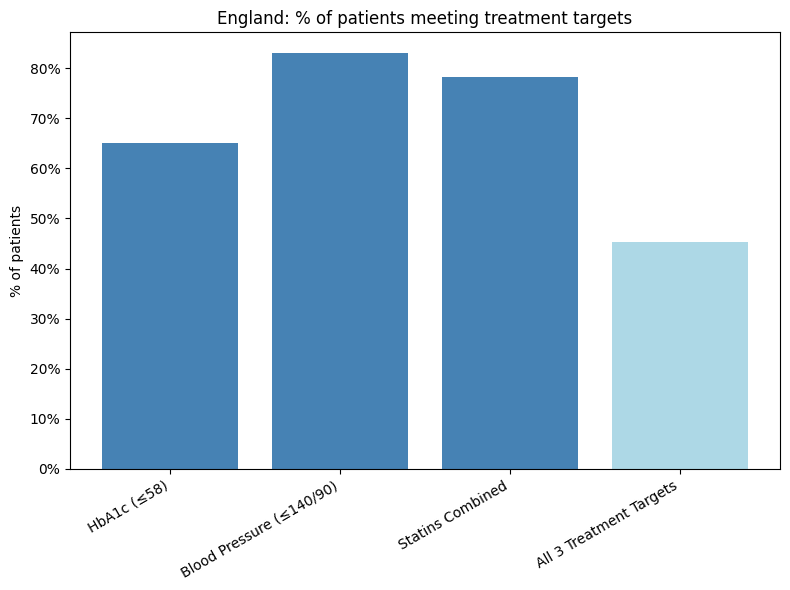

In [53]:
# National level treatment targets
eng_targets = {
    "HbA1c (≤58)": df_t2_CP_TT_england["HbA1c <= 58 mmol/mol"].item(),
    "Blood Pressure (≤140/90)": df_t2_CP_TT_england["Blood Pressure <= 140/90"].item(),
    "Statins Combined": df_t2_CP_TT_england["Statins Combined"].item(),
    "All 3 Treatment Targets": df_t2_CP_TT_england["All 3 Treatment Targets"].item()
}

# Plot the bar chart for England treatment targets
plt.figure(figsize=(8, 6))
plt.bar(eng_targets.keys(), eng_targets.values(),
        color=["steelblue","steelblue","steelblue","lightblue"])

plt.title("England: % of patients meeting treatment targets")
plt.ylabel("% of patients")
plt.xticks(rotation=30, ha="right")
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.tight_layout()
plt.show()

In [54]:
# Display the national treatment targets DataFrame
df_t2_CP_TT_england[["HbA1c <= 58 mmol/mol", "Blood Pressure <= 140/90", "Statins Combined", "All 3 Treatment Targets"]]

,HbA1c <= 58 mmol/mol,Blood Pressure <= 140/90,Statins Combined,All 3 Treatment Targets
0,65.0,83.0,78.2,45.4


#### **Analysis – Treatment Targets**

- HbA1c is the lowest-achieving target. Across England, only 65% of Type 2 patients achieved HbA1c ≤58 mmol/mol, compared with 83% for Blood Pressure ≤140/90 and 78.2% for statin prescription (combined). This confirms that glycaemic control remains the hardest clinical goal to meet.

- Statins and blood pressure control are much higher, with the majority of patients meeting these two targets. This suggests lipid and hypertension management are relatively well-embedded in routine diabetes care.

- Achievement of all 3 targets simultaneously is much lower than any individual target, at just 45.4% nationally. This highlights the challenge of multi-factorial risk management in Type 2 diabetes.

- Large regional variation exists across ICBs. NHS North West London is the best-performing ICB reporting 50% of patients achieving all 3 targets, compared with 40.8% in NHS Gloucestershire being the lowest-performing ICB — a 9.2 percentage point gap.

- **Benchmarking:** 20 ICBs perform above the England average for all 3 treatment targets, while 21 are below.

- **Implication:** Improving HbA1c outcomes is the single biggest opportunity to raise overall target achievement. Narrowing the gap between high- and low-performing ICBs could also significantly improve equity in diabetes care.

## *2.4. Regional Variation in Care Quality*

Comparing care processes (what gets measured) with treatment targets (what gets achieved) reveals whether strong monitoring translates into better outcomes. This section identifies ICBs that are high or low performers across both measures, and explores the performance gap.

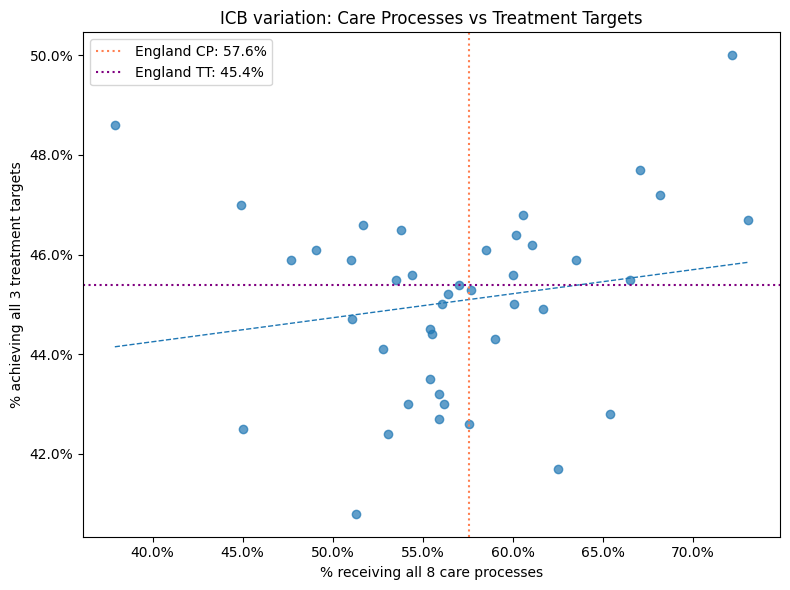

In [55]:
# Create a DataFrame for ICB quality metrics and exclude Detained Estates
icb_quality = df_t2_CP_TT_icb[["ICB name","All 8 Care Processes","All 3 Treatment Targets"]].copy()
icb_quality = icb_quality[~icb_quality["ICB name"].str.contains("detained estates", case=False, na=False)]

# Define x and y for linear regression
x = icb_quality["All 8 Care Processes"].astype(float).to_numpy()
y = icb_quality["All 3 Treatment Targets"].astype(float).to_numpy()

# Fit linear regression
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.7)
plt.plot([x.min(), x.max()], [m*x.min()+b, m*x.max()+b], linestyle="--", linewidth=1)

# Plot ICB variation between care processes and treatment targets with England benchmarks
eng_cp = df_t2_CP_TT_england["All 8 Care Processes"].item()
eng_tt = df_t2_CP_TT_england["All 3 Treatment Targets"].item()
plt.axvline(eng_cp, color="coral", linestyle=":", label=f"England CP: {eng_cp:.1f}%")
plt.axhline(eng_tt, color="purple", linestyle=":", label=f"England TT: {eng_tt:.1f}%")
plt.title("ICB variation: Care Processes vs Treatment Targets")
plt.xlabel("% receiving all 8 care processes")
plt.ylabel("% achieving all 3 treatment targets")
plt.gca().xaxis.set_major_formatter(PercentFormatter(100))
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
# Get England benchmark values (national averages)
eng_cp = df_t2_CP_TT_england["All 8 Care Processes"].iloc[0]
eng_tt = df_t2_CP_TT_england["All 3 Treatment Targets"].iloc[0]

# Prepare ICB-level data for comparison
icb_quality = df_t2_CP_TT_icb[["ICB name","All 8 Care Processes","All 3 Treatment Targets"]].copy()
icb_quality = icb_quality[~icb_quality["ICB name"].str.contains("detained estates", case=False, na=False)]

# Split ICBs into groups compared with England benchmark
both_above = icb_quality[
    (icb_quality["All 8 Care Processes"] >= eng_cp) & 
    (icb_quality["All 3 Treatment Targets"] >= eng_tt)
]
both_below = icb_quality[
    (icb_quality["All 8 Care Processes"] <= eng_cp) & 
    (icb_quality["All 3 Treatment Targets"] <= eng_tt)
]
cp_above_tt_below = icb_quality[
    (icb_quality["All 8 Care Processes"] >= eng_cp) & 
    (icb_quality["All 3 Treatment Targets"] < eng_tt)
]
cp_below_tt_above = icb_quality[
    (icb_quality["All 8 Care Processes"] < eng_cp) & 
    (icb_quality["All 3 Treatment Targets"] >= eng_tt)
]

# Find ICBs exactly equal to the benchmarks (Round to 3 decimals to avoid floating-point comparison issues)
eq_cp = icb_quality["All 8 Care Processes"].round(3) == round(eng_cp, 3)
eq_tt = icb_quality["All 3 Treatment Targets"].round(3) == round(eng_tt, 3)
equals_any = icb_quality[eq_cp | eq_tt]

# Print summary counts for reporting
print(f"England benchmarks → CP: {eng_cp:.1f}% | TT: {eng_tt:.1f}%")
print(f"Both above: {len(both_above)} ICBs")
print(f"Both below: {len(both_below)} ICBs")
print(f"CP above & TT below: {len(cp_above_tt_below)} ICBs")
print(f"CP below & TT above: {len(cp_below_tt_above)} ICBs")
print(f"Equal to benchmark on CP or TT: {len(equals_any)} ICBs")

England benchmarks → CP: 57.6% | TT: 45.4%
Both above: 11 ICBs
Both below: 16 ICBs
CP above & TT below: 7 ICBs
CP below & TT above: 10 ICBs
Equal to benchmark on CP or TT: 2 ICBs


In [58]:
# Print full list for both_above
print("\n--- Both above England ---")
for _, row in both_above.iterrows():
    print(f"{row['ICB name']}: CP {row['All 8 Care Processes']:.1f}% | TT {row['All 3 Treatment Targets']:.1f}%")

# Print full list for both_below
print("\n--- Both below England ---")
for _, row in both_below.iterrows():
    print(f"{row['ICB name']}: CP {row['All 8 Care Processes']:.1f}% | TT {row['All 3 Treatment Targets']:.1f}%")


--- Both above England ---
NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB: CP 58.5% | TT 46.1%
NHS SUFFOLK AND NORTH EAST ESSEX ICB: CP 68.2% | TT 47.2%
NHS HERTFORDSHIRE AND WEST ESSEX ICB: CP 63.5% | TT 45.9%
NHS NORTH EAST LONDON ICB: CP 73.1% | TT 46.7%
NHS NORTH CENTRAL LONDON ICB: CP 60.6% | TT 46.8%
NHS FRIMLEY ICB: CP 67.1% | TT 47.7%
NHS SUSSEX ICB: CP 60.0% | TT 45.6%
NHS GREATER MANCHESTER ICB: CP 60.2% | TT 46.4%
NHS NORTH WEST LONDON ICB: CP 72.2% | TT 50.0%
NHS BUCKINGHAMSHIRE, OXFORDSHIRE AND BERKSHIRE WEST ICB: CP 66.5% | TT 45.5%
NHS SURREY HEARTLANDS ICB: CP 61.1% | TT 46.2%

--- Both below England ---
NHS LANCASHIRE AND SOUTH CUMBRIA ICB: CP 57.0% | TT 45.4%
NHS DERBY AND DERBYSHIRE ICB: CP 55.9% | TT 43.2%
NHS DEVON ICB: CP 55.5% | TT 44.4%
NHS LINCOLNSHIRE ICB: CP 52.8% | TT 44.1%
NHS KENT AND MEDWAY ICB: CP 51.1% | TT 44.7%
NHS NORFOLK AND WAVENEY ICB: CP 56.1% | TT 45.0%
NHS SHROPSHIRE, TELFORD AND WREKIN ICB: CP 45.0% | TT 42.5%
NHS BATH AND NORTH EAST SOMERSET, SWIN

#### **Analysis – Regional Variation**

- There is a positive association between delivery of all 8 care processes and achievement of all 3 treatment targets across ICBs. This suggests that stronger performance in routine monitoring can support better outcomes.

- However, the spread of points shows that high delivery of care processes does not always guarantee success on treatment targets, indicating other factors (such as patient engagement, system capacity, or clinical complexity) also play a role.

- **National benchmarks are overlaid**: England averages are 57.6% for care processes and 45.4% for treatment targets. Several ICBs fall below both lines, highlighting regions that may need targeted support.

- **Implication:** Raising treatment target achievement requires not only improving care process delivery, but also ensuring effective follow-up and management after checks are performed.

## *2.5. Equity Check*

Equity is central to diabetes care. Outcomes should not vary by patient demographics such as age, sex, or ethnicity. This section looks for patterns across groups to understand whether any inequalities are visible in the NDA dataset, and what this implies for service delivery.

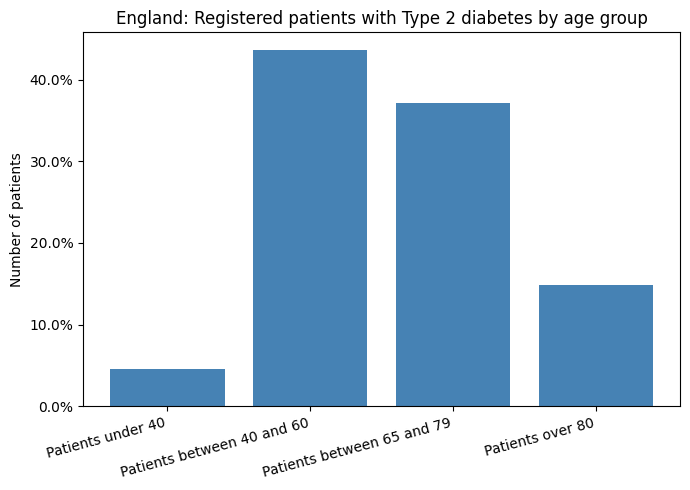

In [59]:
# Define age group columns
age_cols = [
    "Patients under 40",
    "Patients between 40 and 60",
    "Patients between 65 and 79",
    "Patients over 80",
]

# Get counts from the England row
age_vals = df_t2_registrations_england[age_cols].iloc[0]

# Plot the bar chart for age distribution of patients with Type 2 diabetes in England
plt.figure(figsize=(7,5))
plt.bar(age_cols, age_vals, color="steelblue")

plt.title("England: Registered patients with Type 2 diabetes by age group")
plt.ylabel("Number of patients")
plt.xticks(rotation=15, ha="right")
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.tight_layout()
plt.show()


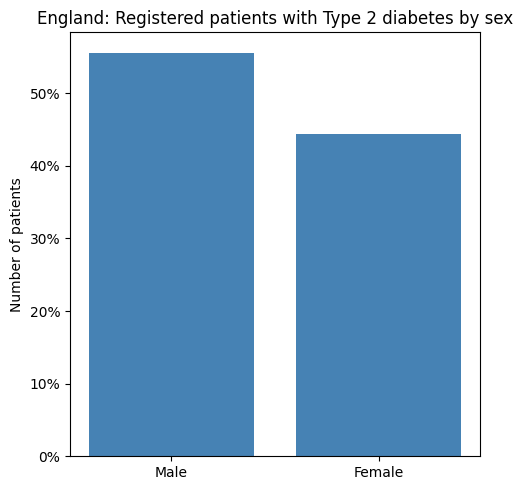

In [60]:
# Define sex columns
sex_cols = ["Male", "Female"]

# Get counts from the England row
sex_vals = df_t2_registrations_england[sex_cols].iloc[0]

# Plot the bar chart
plt.figure(figsize=(5,5))
plt.bar(sex_cols, sex_vals, color="steelblue")

plt.title("England: Registered patients with Type 2 diabetes by sex")
plt.ylabel("Number of patients")
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.tight_layout()
plt.show()


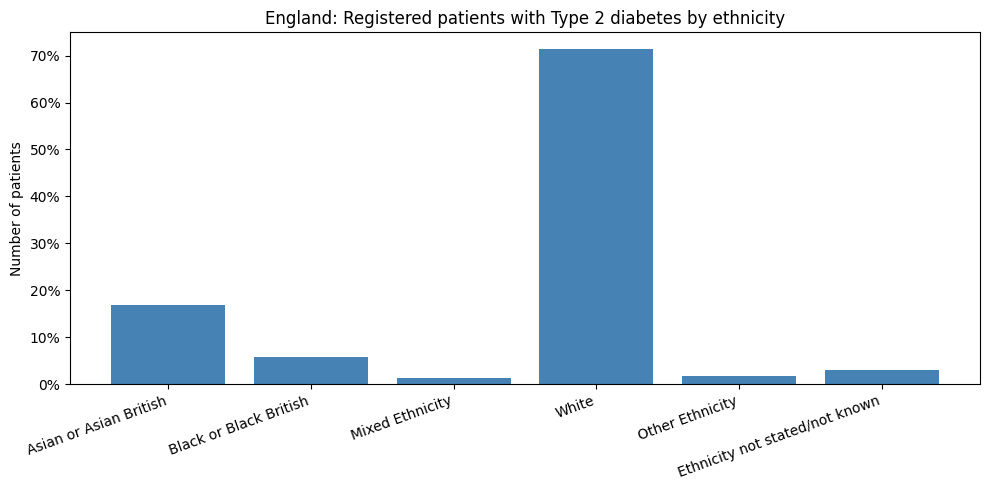

In [61]:
# Define columns for ethnicity
eth_cols = [
    "Asian or Asian British",
    "Black or Black British",
    "Mixed Ethnicity",
    "White",
    "Other Ethnicity",
    "Ethnicity not stated/not known",
]

# Get counts from the England row
eth_vals = df_t2_registrations_england[eth_cols].iloc[0]

# Plot the bar chart
plt.figure(figsize=(10,5))
plt.bar(eth_cols, eth_vals, color="steelblue")

plt.title("England: Registered patients with Type 2 diabetes by ethnicity")
plt.ylabel("Number of patients")
plt.xticks(rotation=20, ha="right")
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.tight_layout()
plt.show()


#### **Analysis - Interpretation of England-level Distributions**

- The England-level charts show the composition of registered patients with Type 2 diabetes across age, sex, and ethnicity. These percentages represent the share of patients in each subgroup relative to the total number of registered patients, not outcomes such as treatment targets or care processes.

    - Age: The majority of patients fall in the 40–79 age range, with relatively few under 40 or over 80.
    - Sex: Men and women are both similarly represented, where men shows slightly higher prevalence than women.
    - Ethnicity: The population is predominantly White, but there is substantial representation from Asian and Asian British, followed by Black or Black British.

In [62]:
# Import sqlite3 to create an in-memory database
import sqlite3

# Create an in-memory SQLite DB and load both DataFrames as tables
con = sqlite3.connect(":memory:")
df_t2_registrations_icb.to_sql("registrations_icb", con, index=False, if_exists="replace")
df_t2_CP_TT_icb.to_sql("cp_tt_icb", con, index=False, if_exists="replace")

43

In [63]:
# Perform an SQL JOIN to combine the two tables on 'ICB code'
sql = """
SELECT
  r."ICB name",
  r."Registered Patients",
  r."Patients under 40",
  r."Patients between 40 and 60",
  r."Patients between 65 and 79",
  r."Patients over 80",
  r."Male",
  r."Female",
  r."Asian or Asian British",
  r."Black or Black British",
  r."Mixed Ethnicity",
  r."White",
  r."Other Ethnicity",
  r."Ethnicity not stated/not known",
  c."All 8 Care Processes",
  c."All 3 Treatment Targets"
FROM registrations_icb r
JOIN cp_tt_icb c
  ON TRIM(r."ICB code") = TRIM(c."ICB code")
WHERE UPPER(TRIM(r."ICB name")) <> 'DETAINED ESTATES';
"""

df_icb_join = pd.read_sql_query(sql, con)
df_icb_join.head()


,ICB name,Registered Patients,Patients under 40,Patients between 40 and 60,Patients between 65 and 79,Patients over 80,Male,Female,Asian or Asian British,Black or Black British,Mixed Ethnicity,White,Other Ethnicity,Ethnicity not stated/not known,All 8 Care Processes,All 3 Treatment Targets
0,NHS LANCASHIRE AND SOUTH CUMBRIA ICB,115515.0,4.2,42.2,38.9,14.7,56.3,43.7,14.8,0.8,0.6,79.9,2.6,1.3,57.0,45.4
1,NHS SOUTH YORKSHIRE ICB,94630.0,5.1,43.6,37.3,14.0,55.5,44.5,7.9,3.0,1.0,84.4,1.2,2.5,51.0,45.9
2,NHS HEREFORDSHIRE AND WORCESTERSHIRE ICB,50305.0,3.3,37.5,41.1,18.1,56.9,43.1,4.2,0.8,0.6,91.4,0.5,2.6,58.5,46.1
3,NHS MID AND SOUTH ESSEX ICB,72315.0,3.7,41.8,38.9,15.6,56.5,43.5,6.7,4.0,1.1,80.2,1.7,6.2,37.9,48.6
4,"NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",73085.0,5.9,48.3,33.8,12.0,54.9,45.1,26.5,8.7,1.6,56.4,1.6,5.2,59.0,44.3


*Note: In a real-world setting, this kind of data extraction would typically be performed using SQL queries from a central database before analysis. For this project, I simulated that process by joining NDA tables in SQLite.*

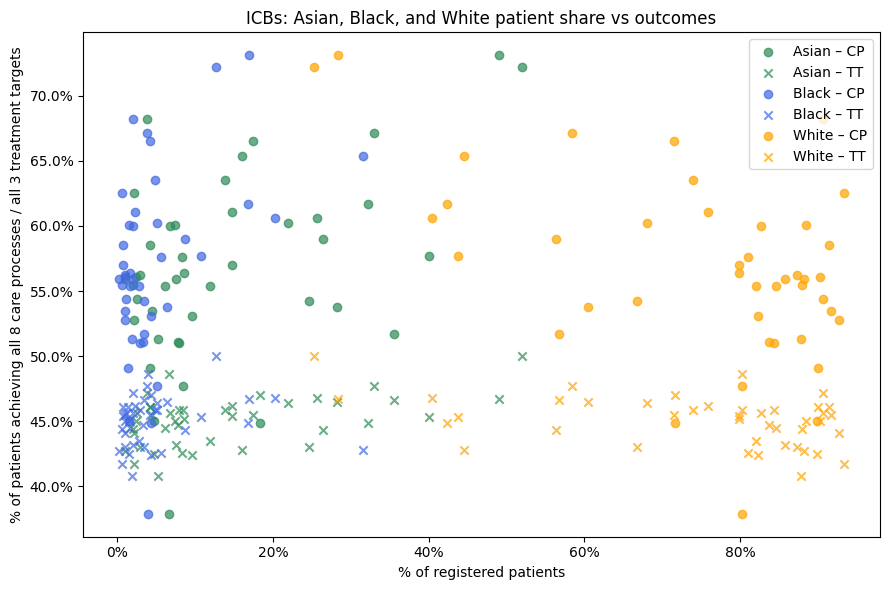

In [64]:
# Scatter plot to show relationship between ethnicity groups and outcomes
plt.figure(figsize=(9,6))

# Asian
plt.scatter(df_icb_join["Asian or Asian British"], df_icb_join["All 8 Care Processes"],
            color="seagreen", alpha=0.7, marker="o", label="Asian – CP")
plt.scatter(df_icb_join["Asian or Asian British"], df_icb_join["All 3 Treatment Targets"],
            color="seagreen", alpha=0.7, marker="x", label="Asian – TT")

# Black
plt.scatter(df_icb_join["Black or Black British"], df_icb_join["All 8 Care Processes"],
            color="royalblue", alpha=0.7, marker="o", label="Black – CP")
plt.scatter(df_icb_join["Black or Black British"], df_icb_join["All 3 Treatment Targets"],
            color="royalblue", alpha=0.7, marker="x", label="Black – TT")

# White
plt.scatter(df_icb_join["White"], df_icb_join["All 8 Care Processes"],
            color="orange", alpha=0.7, marker="o", label="White – CP")
plt.scatter(df_icb_join["White"], df_icb_join["All 3 Treatment Targets"],
            color="orange", alpha=0.7, marker="x", label="White – TT")

plt.xlabel("% of registered patients")
plt.ylabel("% of patients achieving all 8 care processes / all 3 treatment targets")
plt.title("ICBs: Asian, Black, and White patient share vs outcomes")
plt.gca().xaxis.set_major_formatter(PercentFormatter(100))
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.legend()
plt.tight_layout()
plt.show()

#### **Analysis – Equity Check By ICB**

- **Ethnicity**

    - Outcomes (CP and TT) are broadly similar across Asian, Black, and White patients at the ICB level.

    - The main difference lies in the population distribution: White patients dominate registrations in most ICBs, while Asian and Black groups are concentrated in specific geographies.

    - This means inequalities in outcomes are less visible in this dataset — the equity issue is more about where patients live (ICBs with higher minority representation) and how those ICBs perform overall.

    - **Implication:** Diabetes UK and NHS policymakers should focus on local system performance in areas with high minority populations, rather than assuming a universal ethnic gap in outcomes.

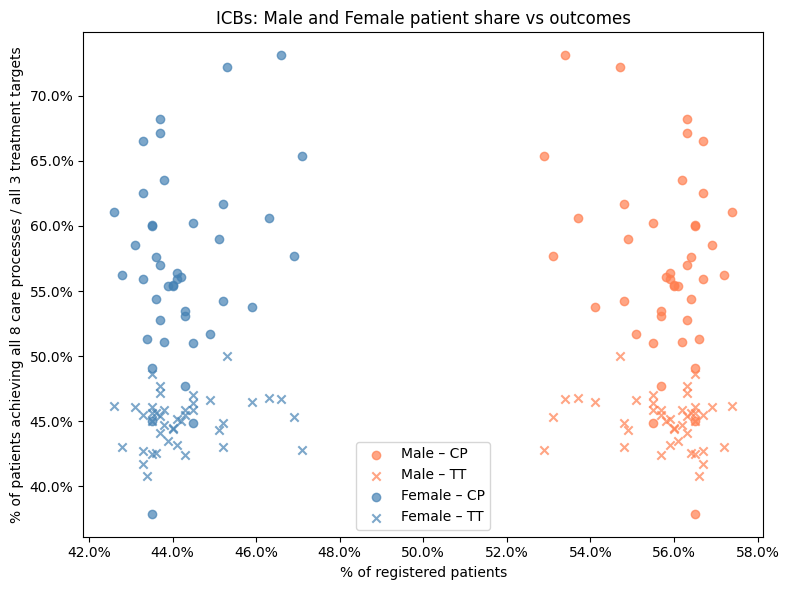

In [65]:
# Scatter plot to show relationship between genders and outcomes
plt.figure(figsize=(8,6))

plt.scatter(df_icb_join["Male"], df_icb_join["All 8 Care Processes"],
            color="coral", alpha=0.7, marker="o", label="Male – CP")
plt.scatter(df_icb_join["Male"], df_icb_join["All 3 Treatment Targets"],
            color="coral", alpha=0.7, marker="x", label="Male – TT")

plt.scatter(df_icb_join["Female"], df_icb_join["All 8 Care Processes"],
            color="steelblue", alpha=0.7, marker="o", label="Female – CP")
plt.scatter(df_icb_join["Female"], df_icb_join["All 3 Treatment Targets"],
            color="steelblue", alpha=0.7, marker="x", label="Female – TT")

plt.xlabel("% of registered patients")
plt.ylabel("% of patients achieving all 8 care processes / all 3 treatment targets")
plt.title("ICBs: Male and Female patient share vs outcomes")
plt.gca().xaxis.set_major_formatter(PercentFormatter(100))
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.legend()
plt.tight_layout()
plt.show()


#### **Analysis – Equity Check By ICB**

- **Sex**

    - Men represent the majority of registered patients with Type 2 diabetes in every ICB. However, achievement rates for care processes and treatment targets are very similar between sexes. This suggests that diabetes care is delivered equitably to men and women at the system level.

    - **Implication:** Sex is not a major driver of variation in diabetes care quality or outcomes in this dataset.

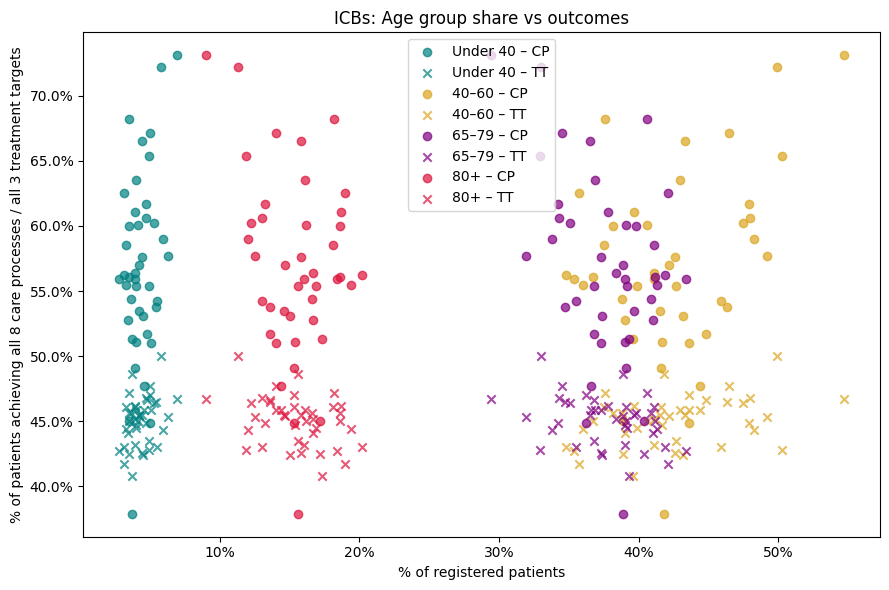

In [66]:
# Scatter plot to show relationship between age groups and outcomes
plt.figure(figsize=(9,6))

# Under 40
plt.scatter(df_icb_join["Patients under 40"], df_icb_join["All 8 Care Processes"],
            color="teal", alpha=0.7, marker="o", label="Under 40 – CP")
plt.scatter(df_icb_join["Patients under 40"], df_icb_join["All 3 Treatment Targets"],
            color="teal", alpha=0.7, marker="x", label="Under 40 – TT")

# 40–60
plt.scatter(df_icb_join["Patients between 40 and 60"], df_icb_join["All 8 Care Processes"],
            color="goldenrod", alpha=0.7, marker="o", label="40–60 – CP")
plt.scatter(df_icb_join["Patients between 40 and 60"], df_icb_join["All 3 Treatment Targets"],
            color="goldenrod", alpha=0.7, marker="x", label="40–60 – TT")

# 65–79
plt.scatter(df_icb_join["Patients between 65 and 79"], df_icb_join["All 8 Care Processes"],
            color="purple", alpha=0.7, marker="o", label="65–79 – CP")
plt.scatter(df_icb_join["Patients between 65 and 79"], df_icb_join["All 3 Treatment Targets"],
            color="purple", alpha=0.7, marker="x", label="65–79 – TT")

# Over 80
plt.scatter(df_icb_join["Patients over 80"], df_icb_join["All 8 Care Processes"],
            color="crimson", alpha=0.7, marker="o", label="80+ – CP")
plt.scatter(df_icb_join["Patients over 80"], df_icb_join["All 3 Treatment Targets"],
            color="crimson", alpha=0.7, marker="x", label="80+ – TT")

plt.xlabel("% of registered patients")
plt.ylabel("% of patients achieving all 8 care processes / all 3 treatment targets")
plt.title("ICBs: Age group share vs outcomes")
plt.gca().xaxis.set_major_formatter(PercentFormatter(100))
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.legend()
plt.tight_layout()
plt.show()


#### **Analysis – Equity Check By ICB**

- **Age**

    - Across ICBs, the largest proportion of patients are in the 40–79 age range, while <40 and >80 groups make up only a small share of registrations.

    - The younger (<40) and older (80+) groups show a more consistent prevalence across ICBs — always a small proportion of the total — whereas the middle-aged groups vary more widely.

    - However, achievement rates for both care processes (CP) and treatment targets (TT) are broadly similar across all age groups. No age group consistently performs better or worse in outcomes.

    - **Implication:** Age differences in this dataset are more about how many patients fall into each group than about disparities in quality of care or outcomes. Interventions may still be tailored by age, but the NDA data doesn’t reveal strong inequities here.

#### **Summary of Equity Check Analysis including National and IBC level**

- Age: Differences across age groups are mainly about prevalence — most patients are 40–79, while <40 and >80 groups make up only small, consistent proportions across ICBs. Outcomes (CP and TT) are broadly similar across all age groups.

- Sex: Male and female patients show very similar achievement rates, with men representing a slightly higher share of registrations. No major inequities are visible by sex.

- Ethnicity: The main difference lies in population share, with White patients forming the majority in most ICBs while Asian and Black groups are concentrated in a few areas. Outcomes (CP and TT) appear broadly similar across groups, so inequities are not strongly reflected in these measures.

- **Actionable Insight:** In this dataset, equity gaps are driven more by population distribution across ICBs than by systematic differences in outcomes. This means local context matters — while outcomes appear similar across groups, ICBs with larger minority populations or younger patients may face different challenges in service delivery. Local context should therefore be considered in equity planning.

---

# 3. Conclusions

- **Prevalence**

Type 2 diabetes remains highly prevalent across England, with notable variation between Integrated Care Boards (ICBs). Some regions manage substantially larger patient populations, placing higher demands on local services.

- **Care Processes** 

Delivery of the 8 recommended checks varies widely. While some ICBs exceed the national benchmark, others lag significantly, with a gap of over 30 percentage points between best and worst performers.

- **Treatment Targets** 

HbA1c control is the hardest goal to meet, while blood pressure and statin prescribing are relatively stronger. Only around half of patients achieve all 3 targets simultaneously, highlighting the challenge of multifactorial management.

- **Regional Variation** 

High- and low-performing ICBs appear consistently across both care processes and treatment targets, suggesting systematic differences in service delivery that could be targeted for improvement.

- **Equity**

Most patients are aged 40–79, with far fewer under 40 or over 80; men are slightly more represented than women; and the majority are White, though there is meaningful Asian and Black representation. Despite these differences in prevalence, outcomes (care processes and treatment targets) appear broadly similar across groups. This suggests that inequalities are more about who is registered as a patient with diabetes than how care is delivered once diagnosed, though younger adults and minority groups remain important to monitor.